# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [94]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [95]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [96]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [99]:
print(X)
print(y)
W1, b1 = net.params['W1'],net.params['b1']
W2, b2 = net.params['W2'],net.params['b2']
N, D = X.shape
print(W1.shape)
print(W2.shape)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
[0 1 2 2 1]
(4, 10)
(10, 3)


In [121]:
scores = np.maximum(X.dot(W1) + b1, 0)
print(scores.shape)
scores = scores.dot(W2) + b2
print(scores.shape)
scores

(5, 10)
(5, 3)


array([[-0.81233741, -1.27654624, -0.70335995],
       [-0.17129677, -1.18803311, -0.47310444],
       [-0.51590475, -1.01354314, -0.8504215 ],
       [-0.15419291, -0.48629638, -0.52901952],
       [-0.00618733, -0.12435261, -0.15226949]])

In [123]:
scores.argmax(axis=1)

array([2, 0, 0, 0, 0])

In [101]:
shift_score = (scores.T - np.max(scores)).T
print(shift_score)
shift_score[range(N),list(y)]

[[-0.80615009 -1.27035892 -0.69717262]
 [-0.16510944 -1.18184578 -0.46691712]
 [-0.50971743 -1.00735582 -0.84423417]
 [-0.14800559 -0.48010906 -0.5228322 ]
 [ 0.         -0.11816528 -0.14608217]]


array([-0.80615009, -1.18184578, -0.84423417, -0.5228322 , -0.11816528])

In [102]:
loss = -np.sum(shift_score[range(N),list(y)]) 
print(loss)
loss += np.sum(np.log(np.sum(np.exp(shift_score),axis=1)))
print(loss)

3.473227523009589
6.329285260590267


In [105]:
reg = 0.05
softmax_output = np.exp(shift_score)/np.sum(np.exp(shift_score), axis = 1).reshape(-1,1)
loss = -np.sum(np.log(softmax_output[range(N), list(y)]))
loss /= N
loss += 0.5* reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
loss

1.2848224717239372

In [109]:
loss, grad = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


In [108]:
grad

{'W2': array([[-5.08521926e-01,  1.74333019e-01,  3.13314701e-01],
        [ 9.75387698e-03, -2.54826091e-03, -2.19037151e-03],
        [ 2.98493150e-01,  1.15009442e-01, -4.23948606e-01],
        [-2.32057373e-01,  1.90765533e-01,  3.76853187e-02],
        [ 7.80728822e-01, -3.48329866e-01, -4.40997054e-01],
        [ 2.14165935e-03,  3.32586112e-04,  1.51235949e-03],
        [-3.17161047e-03, -1.81370583e-03, -3.36230224e-03],
        [ 6.35259267e-02, -1.25834758e-01,  4.78139209e-02],
        [ 6.31166815e-01, -8.23934478e-02, -5.58046133e-01],
        [ 8.87021083e-01, -6.00172857e-01, -2.88811080e-01]]),
 'b2': array([ 0.2099691, -0.1431905, -0.0667786]),
 'W1': array([[-1.05670166e-01,  2.00078604e-03, -2.10411518e-01,
          1.76781886e-01,  1.51193855e-01, -4.88638940e-03,
          4.75044209e-03,  3.44562949e-03, -2.95861868e-02,
         -7.73102052e-03],
        [ 4.38392829e-02,  7.27136753e-03,  6.91710314e-01,
         -2.89224702e-01, -2.69206305e-01,  1.66837164e-0

In [42]:
scores = loss
print(scores)
# correct_class_scores = scores[range(scores.shape[0]),list(y)]
shift_score = scores.T - np.max(scores) # to make broadcast work
shift_score

[-0.6879848  -1.0636805  -0.72606889 -0.40466691  0.        ]


array([-0.6879848 , -1.0636805 , -0.72606889, -0.40466691,  0.        ])

In [32]:
loss - np.max(loss)

array([[-2.01673634, -1.48094516, -0.90775887],
       [ 0.        , -2.01673634, -0.30180767],
       [-0.68221959, -1.17985798, -2.01673634],
       [-0.64190972, -0.9740132 , -2.01673634],
       [-0.89857105, -2.01673634, -1.04465322]])

# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [81]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01714364353292376


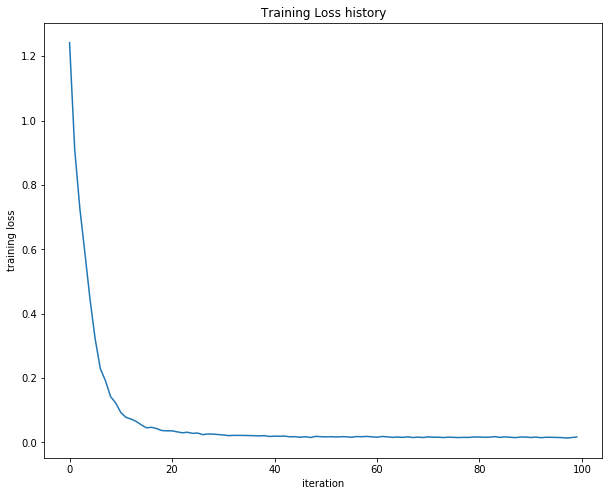

In [110]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [119]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [161]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: %f' %val_acc)



iteration 0 / 1000: loss 2.302941
it ==  0.000000, iterations_per_epoch = 245
it ==  1.000000, iterations_per_epoch = 245
it ==  2.000000, iterations_per_epoch = 245
it ==  3.000000, iterations_per_epoch = 245
it ==  4.000000, iterations_per_epoch = 245
it ==  5.000000, iterations_per_epoch = 245
it ==  6.000000, iterations_per_epoch = 245
it ==  7.000000, iterations_per_epoch = 245
it ==  8.000000, iterations_per_epoch = 245
it ==  9.000000, iterations_per_epoch = 245
it ==  10.000000, iterations_per_epoch = 245
it ==  11.000000, iterations_per_epoch = 245
it ==  12.000000, iterations_per_epoch = 245
it ==  13.000000, iterations_per_epoch = 245
it ==  14.000000, iterations_per_epoch = 245
it ==  15.000000, iterations_per_epoch = 245
it ==  16.000000, iterations_per_epoch = 245
it ==  17.000000, iterations_per_epoch = 245
it ==  18.000000, iterations_per_epoch = 245
it ==  19.000000, iterations_per_epoch = 245
it ==  20.000000, iterations_per_epoch = 245
it ==  21.000000, iterations_pe

it ==  201.000000, iterations_per_epoch = 245
it ==  202.000000, iterations_per_epoch = 245
it ==  203.000000, iterations_per_epoch = 245
it ==  204.000000, iterations_per_epoch = 245
it ==  205.000000, iterations_per_epoch = 245
it ==  206.000000, iterations_per_epoch = 245
it ==  207.000000, iterations_per_epoch = 245
it ==  208.000000, iterations_per_epoch = 245
it ==  209.000000, iterations_per_epoch = 245
it ==  210.000000, iterations_per_epoch = 245
it ==  211.000000, iterations_per_epoch = 245
it ==  212.000000, iterations_per_epoch = 245
it ==  213.000000, iterations_per_epoch = 245
it ==  214.000000, iterations_per_epoch = 245
it ==  215.000000, iterations_per_epoch = 245
it ==  216.000000, iterations_per_epoch = 245
it ==  217.000000, iterations_per_epoch = 245
it ==  218.000000, iterations_per_epoch = 245
it ==  219.000000, iterations_per_epoch = 245
it ==  220.000000, iterations_per_epoch = 245
it ==  221.000000, iterations_per_epoch = 245
it ==  222.000000, iterations_per_

it ==  383.000000, iterations_per_epoch = 245
it ==  384.000000, iterations_per_epoch = 245
it ==  385.000000, iterations_per_epoch = 245
it ==  386.000000, iterations_per_epoch = 245
it ==  387.000000, iterations_per_epoch = 245
it ==  388.000000, iterations_per_epoch = 245
it ==  389.000000, iterations_per_epoch = 245
it ==  390.000000, iterations_per_epoch = 245
it ==  391.000000, iterations_per_epoch = 245
it ==  392.000000, iterations_per_epoch = 245
it ==  393.000000, iterations_per_epoch = 245
it ==  394.000000, iterations_per_epoch = 245
it ==  395.000000, iterations_per_epoch = 245
it ==  396.000000, iterations_per_epoch = 245
it ==  397.000000, iterations_per_epoch = 245
it ==  398.000000, iterations_per_epoch = 245
it ==  399.000000, iterations_per_epoch = 245
iteration 400 / 1000: loss 2.221559
it ==  400.000000, iterations_per_epoch = 245
it ==  401.000000, iterations_per_epoch = 245
it ==  402.000000, iterations_per_epoch = 245
it ==  403.000000, iterations_per_epoch = 24

it ==  566.000000, iterations_per_epoch = 245
it ==  567.000000, iterations_per_epoch = 245
it ==  568.000000, iterations_per_epoch = 245
it ==  569.000000, iterations_per_epoch = 245
it ==  570.000000, iterations_per_epoch = 245
it ==  571.000000, iterations_per_epoch = 245
it ==  572.000000, iterations_per_epoch = 245
it ==  573.000000, iterations_per_epoch = 245
it ==  574.000000, iterations_per_epoch = 245
it ==  575.000000, iterations_per_epoch = 245
it ==  576.000000, iterations_per_epoch = 245
it ==  577.000000, iterations_per_epoch = 245
it ==  578.000000, iterations_per_epoch = 245
it ==  579.000000, iterations_per_epoch = 245
it ==  580.000000, iterations_per_epoch = 245
it ==  581.000000, iterations_per_epoch = 245
it ==  582.000000, iterations_per_epoch = 245
it ==  583.000000, iterations_per_epoch = 245
it ==  584.000000, iterations_per_epoch = 245
it ==  585.000000, iterations_per_epoch = 245
it ==  586.000000, iterations_per_epoch = 245
it ==  587.000000, iterations_per_

it ==  751.000000, iterations_per_epoch = 245
it ==  752.000000, iterations_per_epoch = 245
it ==  753.000000, iterations_per_epoch = 245
it ==  754.000000, iterations_per_epoch = 245
it ==  755.000000, iterations_per_epoch = 245
it ==  756.000000, iterations_per_epoch = 245
it ==  757.000000, iterations_per_epoch = 245
it ==  758.000000, iterations_per_epoch = 245
it ==  759.000000, iterations_per_epoch = 245
it ==  760.000000, iterations_per_epoch = 245
it ==  761.000000, iterations_per_epoch = 245
it ==  762.000000, iterations_per_epoch = 245
it ==  763.000000, iterations_per_epoch = 245
it ==  764.000000, iterations_per_epoch = 245
it ==  765.000000, iterations_per_epoch = 245
it ==  766.000000, iterations_per_epoch = 245
it ==  767.000000, iterations_per_epoch = 245
it ==  768.000000, iterations_per_epoch = 245
it ==  769.000000, iterations_per_epoch = 245
it ==  770.000000, iterations_per_epoch = 245
it ==  771.000000, iterations_per_epoch = 245
it ==  772.000000, iterations_per_

it ==  940.000000, iterations_per_epoch = 245
it ==  941.000000, iterations_per_epoch = 245
it ==  942.000000, iterations_per_epoch = 245
it ==  943.000000, iterations_per_epoch = 245
it ==  944.000000, iterations_per_epoch = 245
it ==  945.000000, iterations_per_epoch = 245
it ==  946.000000, iterations_per_epoch = 245
it ==  947.000000, iterations_per_epoch = 245
it ==  948.000000, iterations_per_epoch = 245
it ==  949.000000, iterations_per_epoch = 245
it ==  950.000000, iterations_per_epoch = 245
it ==  951.000000, iterations_per_epoch = 245
it ==  952.000000, iterations_per_epoch = 245
it ==  953.000000, iterations_per_epoch = 245
it ==  954.000000, iterations_per_epoch = 245
it ==  955.000000, iterations_per_epoch = 245
it ==  956.000000, iterations_per_epoch = 245
it ==  957.000000, iterations_per_epoch = 245
it ==  958.000000, iterations_per_epoch = 245
it ==  959.000000, iterations_per_epoch = 245
it ==  960.000000, iterations_per_epoch = 245
it ==  961.000000, iterations_per_

49000

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

In [157]:
stats['train_acc_history']

[0.11, 0.155, 0.17, 0.215, 0.3]

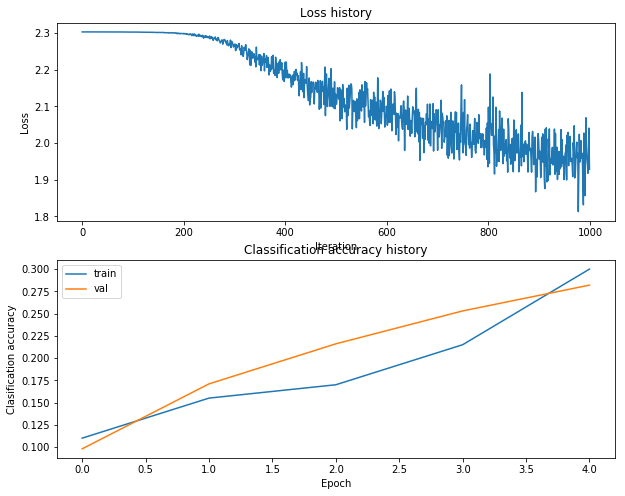

In [156]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.legend()
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

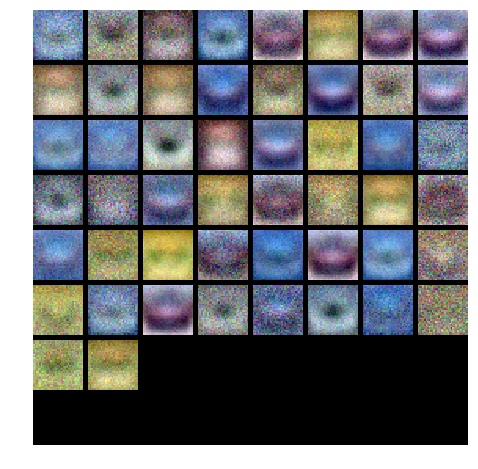

In [127]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [ ]:
best_net = None # store the best model into this 
best_status = None
best_acc = 0.0
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
h_size = [50, 100, 200, 400]
# h_size = [32,128]
learning_rate = [1e-4, 1e-5, 5e-5, 5e-6, 1e-6]
# learning_rate = [1e-4, 5e-5]
batch = [300,500,2000]
# batch = [200,500]
regularization = [0.5, 0.25, 0.2, 0.1, 0.05]
# regularization = [0.5, 0.2]

input_size = 32 * 32 * 3
# hidden_size = 50
num_classes = 10
result = {}
count = 1
for h in h_size:
    for lr in learning_rate:
        for b in batch:
            for r in regularization:
                print("running %d st set of parameters..." %count)
                count += 1
                
                net = TwoLayerNet(input_size, h, num_classes)

                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=6000, batch_size=b,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=r, verbose=True)

                # Predict on the validation set
                tra_acc = (net.predict(X_train) == y_train).mean()
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: %f' %val_acc)
                result[(h,lr,b,r)] = (tra_acc,val_acc)
                if val_acc > best_acc:
                    best_acc = val_acc
                    best_net = net
                    best_status = stats


#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

running 1 st set of parameters...
iteration 0 / 6000: loss 2.303012
iteration 100 / 6000: loss 2.302584
iteration 200 / 6000: loss 2.299010
iteration 300 / 6000: loss 2.268735
iteration 400 / 6000: loss 2.204546
iteration 500 / 6000: loss 2.115956
iteration 600 / 6000: loss 2.087188
iteration 700 / 6000: loss 2.038480
iteration 800 / 6000: loss 1.959934
iteration 900 / 6000: loss 2.051256
iteration 1000 / 6000: loss 1.963832
iteration 1100 / 6000: loss 1.967433
iteration 1200 / 6000: loss 1.968981
iteration 1300 / 6000: loss 1.845916
iteration 1400 / 6000: loss 1.897956
iteration 1500 / 6000: loss 1.932522
iteration 1600 / 6000: loss 1.839096
iteration 1700 / 6000: loss 1.840240
iteration 1800 / 6000: loss 1.793422
iteration 1900 / 6000: loss 1.872010
iteration 2000 / 6000: loss 1.889855
iteration 2100 / 6000: loss 1.853244
iteration 2200 / 6000: loss 1.783765
iteration 2300 / 6000: loss 1.731014
iteration 2400 / 6000: loss 1.784978
iteration 2500 / 6000: loss 1.743168
iteration 2600 /

iteration 3700 / 6000: loss 1.784009
iteration 3800 / 6000: loss 1.739136
iteration 3900 / 6000: loss 1.707076
iteration 4000 / 6000: loss 1.728460
iteration 4100 / 6000: loss 1.699471
iteration 4200 / 6000: loss 1.699193
iteration 4300 / 6000: loss 1.663841
iteration 4400 / 6000: loss 1.711345
iteration 4500 / 6000: loss 1.699755
iteration 4600 / 6000: loss 1.631238
iteration 4700 / 6000: loss 1.689842
iteration 4800 / 6000: loss 1.678259
iteration 4900 / 6000: loss 1.781967
iteration 5000 / 6000: loss 1.629443
iteration 5100 / 6000: loss 1.755265
iteration 5200 / 6000: loss 1.675811
iteration 5300 / 6000: loss 1.653350
iteration 5400 / 6000: loss 1.616037
iteration 5500 / 6000: loss 1.622635
iteration 5600 / 6000: loss 1.659370
iteration 5700 / 6000: loss 1.631651
iteration 5800 / 6000: loss 1.632941
iteration 5900 / 6000: loss 1.602343
Validation accuracy: 0.412000
running 5 st set of parameters...
iteration 0 / 6000: loss 2.302611
iteration 100 / 6000: loss 2.302203
iteration 200 /

iteration 1300 / 6000: loss 1.912448
iteration 1400 / 6000: loss 1.912466
iteration 1500 / 6000: loss 1.872056
iteration 1600 / 6000: loss 1.896989
iteration 1700 / 6000: loss 1.875446
iteration 1800 / 6000: loss 1.936700
iteration 1900 / 6000: loss 1.845730
iteration 2000 / 6000: loss 1.868585
iteration 2100 / 6000: loss 1.876878
iteration 2200 / 6000: loss 1.851207
iteration 2300 / 6000: loss 1.842348
iteration 2400 / 6000: loss 1.830514
iteration 2500 / 6000: loss 1.845218
iteration 2600 / 6000: loss 1.824766
iteration 2700 / 6000: loss 1.817282
iteration 2800 / 6000: loss 1.795068
iteration 2900 / 6000: loss 1.797674
iteration 3000 / 6000: loss 1.828353
iteration 3100 / 6000: loss 1.806062
iteration 3200 / 6000: loss 1.855305
iteration 3300 / 6000: loss 1.769820
iteration 3400 / 6000: loss 1.795242
iteration 3500 / 6000: loss 1.777320
iteration 3600 / 6000: loss 1.779492
iteration 3700 / 6000: loss 1.764137
iteration 3800 / 6000: loss 1.817877
iteration 3900 / 6000: loss 1.746186
i

iteration 5100 / 6000: loss 2.141995
iteration 5200 / 6000: loss 2.125130
iteration 5300 / 6000: loss 2.121238
iteration 5400 / 6000: loss 2.130729
iteration 5500 / 6000: loss 2.116359
iteration 5600 / 6000: loss 2.127100
iteration 5700 / 6000: loss 2.101346
iteration 5800 / 6000: loss 2.118710
iteration 5900 / 6000: loss 2.128871
Validation accuracy: 0.227000
running 12 st set of parameters...
iteration 0 / 6000: loss 2.302792
iteration 100 / 6000: loss 2.302356
iteration 200 / 6000: loss 2.300435
iteration 300 / 6000: loss 2.293556
iteration 400 / 6000: loss 2.271687
iteration 500 / 6000: loss 2.246791
iteration 600 / 6000: loss 2.214776
iteration 700 / 6000: loss 2.218482
iteration 800 / 6000: loss 2.178616
iteration 900 / 6000: loss 2.173514
iteration 1000 / 6000: loss 2.163825
iteration 1100 / 6000: loss 2.154413
iteration 1200 / 6000: loss 2.146856
iteration 1300 / 6000: loss 2.154940
iteration 1400 / 6000: loss 2.134633
iteration 1500 / 6000: loss 2.127843
iteration 1600 / 6000:

iteration 2700 / 6000: loss 2.135268
iteration 2800 / 6000: loss 2.136670
iteration 2900 / 6000: loss 2.126232
iteration 3000 / 6000: loss 2.118183
iteration 3100 / 6000: loss 2.144997
iteration 3200 / 6000: loss 2.141967
iteration 3300 / 6000: loss 2.136171
iteration 3400 / 6000: loss 2.140485
iteration 3500 / 6000: loss 2.141825
iteration 3600 / 6000: loss 2.137081
iteration 3700 / 6000: loss 2.126333
iteration 3800 / 6000: loss 2.149031
iteration 3900 / 6000: loss 2.144202
iteration 4000 / 6000: loss 2.128242
iteration 4100 / 6000: loss 2.137764
iteration 4200 / 6000: loss 2.141569
iteration 4300 / 6000: loss 2.143127
iteration 4400 / 6000: loss 2.140809
iteration 4500 / 6000: loss 2.126788
iteration 4600 / 6000: loss 2.136562
iteration 4700 / 6000: loss 2.144206
iteration 4800 / 6000: loss 2.133248
iteration 4900 / 6000: loss 2.139823
iteration 5000 / 6000: loss 2.118831
iteration 5100 / 6000: loss 2.116943
iteration 5200 / 6000: loss 2.145386
iteration 5300 / 6000: loss 2.129040
i

iteration 300 / 6000: loss 2.302592
iteration 400 / 6000: loss 2.302593
iteration 500 / 6000: loss 2.302573
iteration 600 / 6000: loss 2.302554
iteration 700 / 6000: loss 2.302497
iteration 800 / 6000: loss 2.302472
iteration 900 / 6000: loss 2.302409
iteration 1000 / 6000: loss 2.302383
iteration 1100 / 6000: loss 2.302369
iteration 1200 / 6000: loss 2.302194
iteration 1300 / 6000: loss 2.302166
iteration 1400 / 6000: loss 2.302226
iteration 1500 / 6000: loss 2.301995
iteration 1600 / 6000: loss 2.301682
iteration 1700 / 6000: loss 2.301895
iteration 1800 / 6000: loss 2.301684
iteration 1900 / 6000: loss 2.301607
iteration 2000 / 6000: loss 2.301500
iteration 2100 / 6000: loss 2.301400
iteration 2200 / 6000: loss 2.301131
iteration 2300 / 6000: loss 2.300795
iteration 2400 / 6000: loss 2.300215
iteration 2500 / 6000: loss 2.300385
iteration 2600 / 6000: loss 2.299830
iteration 2700 / 6000: loss 2.298981
iteration 2800 / 6000: loss 2.298895
iteration 2900 / 6000: loss 2.299419
iteratio

iteration 4100 / 6000: loss 2.300711
iteration 4200 / 6000: loss 2.300486
iteration 4300 / 6000: loss 2.299960
iteration 4400 / 6000: loss 2.300255
iteration 4500 / 6000: loss 2.300332
iteration 4600 / 6000: loss 2.300435
iteration 4700 / 6000: loss 2.299967
iteration 4800 / 6000: loss 2.300271
iteration 4900 / 6000: loss 2.300395
iteration 5000 / 6000: loss 2.299785
iteration 5100 / 6000: loss 2.300411
iteration 5200 / 6000: loss 2.300155
iteration 5300 / 6000: loss 2.299430
iteration 5400 / 6000: loss 2.299723
iteration 5500 / 6000: loss 2.299562
iteration 5600 / 6000: loss 2.299473
iteration 5700 / 6000: loss 2.298921
iteration 5800 / 6000: loss 2.299198
iteration 5900 / 6000: loss 2.299896
Validation accuracy: 0.188000
running 23 st set of parameters...
iteration 0 / 6000: loss 2.302740
iteration 100 / 6000: loss 2.302736
iteration 200 / 6000: loss 2.302698
iteration 300 / 6000: loss 2.302679
iteration 400 / 6000: loss 2.302668
iteration 500 / 6000: loss 2.302636
iteration 600 / 60

iteration 1700 / 6000: loss 2.302848
iteration 1800 / 6000: loss 2.302850
iteration 1900 / 6000: loss 2.302861
iteration 2000 / 6000: loss 2.302845
iteration 2100 / 6000: loss 2.302868
iteration 2200 / 6000: loss 2.302846
iteration 2300 / 6000: loss 2.302851
iteration 2400 / 6000: loss 2.302860
iteration 2500 / 6000: loss 2.302845
iteration 2600 / 6000: loss 2.302841
iteration 2700 / 6000: loss 2.302847
iteration 2800 / 6000: loss 2.302856
iteration 2900 / 6000: loss 2.302855
iteration 3000 / 6000: loss 2.302854
iteration 3100 / 6000: loss 2.302848
iteration 3200 / 6000: loss 2.302854
iteration 3300 / 6000: loss 2.302848
iteration 3400 / 6000: loss 2.302850
iteration 3500 / 6000: loss 2.302847
iteration 3600 / 6000: loss 2.302850
iteration 3700 / 6000: loss 2.302857
iteration 3800 / 6000: loss 2.302842
iteration 3900 / 6000: loss 2.302860
iteration 4000 / 6000: loss 2.302855
iteration 4100 / 6000: loss 2.302858
iteration 4200 / 6000: loss 2.302852
iteration 4300 / 6000: loss 2.302858
i

iteration 5500 / 6000: loss 2.302551
iteration 5600 / 6000: loss 2.302557
iteration 5700 / 6000: loss 2.302549
iteration 5800 / 6000: loss 2.302549
iteration 5900 / 6000: loss 2.302549
Validation accuracy: 0.205000
running 30 st set of parameters...
iteration 0 / 6000: loss 2.302613
iteration 100 / 6000: loss 2.302595
iteration 200 / 6000: loss 2.302572
iteration 300 / 6000: loss 2.302555
iteration 400 / 6000: loss 2.302541
iteration 500 / 6000: loss 2.302528
iteration 600 / 6000: loss 2.302518
iteration 700 / 6000: loss 2.302510
iteration 800 / 6000: loss 2.302504
iteration 900 / 6000: loss 2.302501
iteration 1000 / 6000: loss 2.302490
iteration 1100 / 6000: loss 2.302490
iteration 1200 / 6000: loss 2.302491
iteration 1300 / 6000: loss 2.302482
iteration 1400 / 6000: loss 2.302472
iteration 1500 / 6000: loss 2.302485
iteration 1600 / 6000: loss 2.302470
iteration 1700 / 6000: loss 2.302479
iteration 1800 / 6000: loss 2.302475
iteration 1900 / 6000: loss 2.302481
iteration 2000 / 6000:

iteration 3100 / 6000: loss 1.939218
iteration 3200 / 6000: loss 1.983271
iteration 3300 / 6000: loss 1.939213
iteration 3400 / 6000: loss 1.924407
iteration 3500 / 6000: loss 1.893225
iteration 3600 / 6000: loss 1.850499
iteration 3700 / 6000: loss 1.927593
iteration 3800 / 6000: loss 1.831199
iteration 3900 / 6000: loss 1.822964
iteration 4000 / 6000: loss 1.906899
iteration 4100 / 6000: loss 1.821591
iteration 4200 / 6000: loss 1.841627
iteration 4300 / 6000: loss 1.931733
iteration 4400 / 6000: loss 1.940081
iteration 4500 / 6000: loss 1.928493
iteration 4600 / 6000: loss 1.896771
iteration 4700 / 6000: loss 1.807359
iteration 4800 / 6000: loss 1.862607
iteration 4900 / 6000: loss 1.898923
iteration 5000 / 6000: loss 1.842118
iteration 5100 / 6000: loss 1.746001
iteration 5200 / 6000: loss 1.899957
iteration 5300 / 6000: loss 1.853034
iteration 5400 / 6000: loss 1.835363
iteration 5500 / 6000: loss 1.885787
iteration 5600 / 6000: loss 1.928493
iteration 5700 / 6000: loss 1.820284
i

iteration 700 / 6000: loss 2.260893
iteration 800 / 6000: loss 2.237135
iteration 900 / 6000: loss 2.232961
iteration 1000 / 6000: loss 2.184928
iteration 1100 / 6000: loss 2.152966
iteration 1200 / 6000: loss 2.148725
iteration 1300 / 6000: loss 2.145250
iteration 1400 / 6000: loss 2.142012
iteration 1500 / 6000: loss 2.116001
iteration 1600 / 6000: loss 2.114068
iteration 1700 / 6000: loss 2.080115
iteration 1800 / 6000: loss 2.102707
iteration 1900 / 6000: loss 2.064526
iteration 2000 / 6000: loss 2.088718
iteration 2100 / 6000: loss 2.013351
iteration 2200 / 6000: loss 2.038658
iteration 2300 / 6000: loss 2.030266
iteration 2400 / 6000: loss 1.983527
iteration 2500 / 6000: loss 2.029248
iteration 2600 / 6000: loss 1.975456
iteration 2700 / 6000: loss 2.047705
iteration 2800 / 6000: loss 1.975947
iteration 2900 / 6000: loss 2.046229
iteration 3000 / 6000: loss 2.046229
iteration 3100 / 6000: loss 2.006293
iteration 3200 / 6000: loss 2.001813
iteration 3300 / 6000: loss 2.039734
iter

iteration 4500 / 6000: loss 1.921923
iteration 4600 / 6000: loss 1.924411
iteration 4700 / 6000: loss 1.886686
iteration 4800 / 6000: loss 1.952165
iteration 4900 / 6000: loss 1.999223
iteration 5000 / 6000: loss 2.003228
iteration 5100 / 6000: loss 1.879495
iteration 5200 / 6000: loss 1.925441
iteration 5300 / 6000: loss 1.948877
iteration 5400 / 6000: loss 1.905235
iteration 5500 / 6000: loss 2.031394
iteration 5600 / 6000: loss 1.917254
iteration 5700 / 6000: loss 1.968541
iteration 5800 / 6000: loss 1.921854
iteration 5900 / 6000: loss 1.955895
Validation accuracy: 0.280000
running 41 st set of parameters...
iteration 0 / 6000: loss 2.302963
iteration 100 / 6000: loss 2.302800
iteration 200 / 6000: loss 2.302520
iteration 300 / 6000: loss 2.302107
iteration 400 / 6000: loss 2.301311
iteration 500 / 6000: loss 2.300115
iteration 600 / 6000: loss 2.298732
iteration 700 / 6000: loss 2.297731
iteration 800 / 6000: loss 2.296432
iteration 900 / 6000: loss 2.294553
iteration 1000 / 6000:

iteration 2100 / 6000: loss 2.293727
iteration 2200 / 6000: loss 2.292442
iteration 2300 / 6000: loss 2.292321
iteration 2400 / 6000: loss 2.293010
iteration 2500 / 6000: loss 2.293029
iteration 2600 / 6000: loss 2.293546
iteration 2700 / 6000: loss 2.292419
iteration 2800 / 6000: loss 2.292372
iteration 2900 / 6000: loss 2.292436
iteration 3000 / 6000: loss 2.292835
iteration 3100 / 6000: loss 2.293097
iteration 3200 / 6000: loss 2.292284
iteration 3300 / 6000: loss 2.292247
iteration 3400 / 6000: loss 2.292473
iteration 3500 / 6000: loss 2.291944
iteration 3600 / 6000: loss 2.293368
iteration 3700 / 6000: loss 2.292526
iteration 3800 / 6000: loss 2.292083
iteration 3900 / 6000: loss 2.292448
iteration 4000 / 6000: loss 2.292317
iteration 4100 / 6000: loss 2.292847
iteration 4200 / 6000: loss 2.292566
iteration 4300 / 6000: loss 2.293330
iteration 4400 / 6000: loss 2.291861
iteration 4500 / 6000: loss 2.292623
iteration 4600 / 6000: loss 2.292995
iteration 4700 / 6000: loss 2.292480
i

iteration 5900 / 6000: loss 2.301577
Validation accuracy: 0.214000
running 48 st set of parameters...
iteration 0 / 6000: loss 2.302736
iteration 100 / 6000: loss 2.302717
iteration 200 / 6000: loss 2.302717
iteration 300 / 6000: loss 2.302708
iteration 400 / 6000: loss 2.302668
iteration 500 / 6000: loss 2.302679
iteration 600 / 6000: loss 2.302651
iteration 700 / 6000: loss 2.302647
iteration 800 / 6000: loss 2.302630
iteration 900 / 6000: loss 2.302631
iteration 1000 / 6000: loss 2.302598
iteration 1100 / 6000: loss 2.302643
iteration 1200 / 6000: loss 2.302612
iteration 1300 / 6000: loss 2.302566
iteration 1400 / 6000: loss 2.302596
iteration 1500 / 6000: loss 2.302561
iteration 1600 / 6000: loss 2.302534
iteration 1700 / 6000: loss 2.302553
iteration 1800 / 6000: loss 2.302530
iteration 1900 / 6000: loss 2.302467
iteration 2000 / 6000: loss 2.302499
iteration 2100 / 6000: loss 2.302518
iteration 2200 / 6000: loss 2.302408
iteration 2300 / 6000: loss 2.302421
iteration 2400 / 6000:

iteration 3500 / 6000: loss 2.302733
iteration 3600 / 6000: loss 2.302755
iteration 3700 / 6000: loss 2.302703
iteration 3800 / 6000: loss 2.302719
iteration 3900 / 6000: loss 2.302699
iteration 4000 / 6000: loss 2.302707
iteration 4100 / 6000: loss 2.302725
iteration 4200 / 6000: loss 2.302710
iteration 4300 / 6000: loss 2.302693
iteration 4400 / 6000: loss 2.302699
iteration 4500 / 6000: loss 2.302723
iteration 4600 / 6000: loss 2.302687
iteration 4700 / 6000: loss 2.302634
iteration 4800 / 6000: loss 2.302705
iteration 4900 / 6000: loss 2.302657
iteration 5000 / 6000: loss 2.302668
iteration 5100 / 6000: loss 2.302647
iteration 5200 / 6000: loss 2.302690
iteration 5300 / 6000: loss 2.302653
iteration 5400 / 6000: loss 2.302701
iteration 5500 / 6000: loss 2.302690
iteration 5600 / 6000: loss 2.302696
iteration 5700 / 6000: loss 2.302632
iteration 5800 / 6000: loss 2.302638
iteration 5900 / 6000: loss 2.302635
Validation accuracy: 0.230000
running 52 st set of parameters...
iteration 

iteration 1100 / 6000: loss 2.302533
iteration 1200 / 6000: loss 2.302514
iteration 1300 / 6000: loss 2.302522
iteration 1400 / 6000: loss 2.302509
iteration 1500 / 6000: loss 2.302492
iteration 1600 / 6000: loss 2.302489
iteration 1700 / 6000: loss 2.302468
iteration 1800 / 6000: loss 2.302461
iteration 1900 / 6000: loss 2.302454
iteration 2000 / 6000: loss 2.302436
iteration 2100 / 6000: loss 2.302445
iteration 2200 / 6000: loss 2.302433
iteration 2300 / 6000: loss 2.302407
iteration 2400 / 6000: loss 2.302397
iteration 2500 / 6000: loss 2.302417
iteration 2600 / 6000: loss 2.302416
iteration 2700 / 6000: loss 2.302423
iteration 2800 / 6000: loss 2.302399
iteration 2900 / 6000: loss 2.302438
iteration 3000 / 6000: loss 2.302364
iteration 3100 / 6000: loss 2.302358
iteration 3200 / 6000: loss 2.302318
iteration 3300 / 6000: loss 2.302410
iteration 3400 / 6000: loss 2.302392
iteration 3500 / 6000: loss 2.302399
iteration 3600 / 6000: loss 2.302365
iteration 3700 / 6000: loss 2.302367
i

iteration 4900 / 6000: loss 2.302668
iteration 5000 / 6000: loss 2.302663
iteration 5100 / 6000: loss 2.302667
iteration 5200 / 6000: loss 2.302664
iteration 5300 / 6000: loss 2.302671
iteration 5400 / 6000: loss 2.302677
iteration 5500 / 6000: loss 2.302658
iteration 5600 / 6000: loss 2.302667
iteration 5700 / 6000: loss 2.302676
iteration 5800 / 6000: loss 2.302666
iteration 5900 / 6000: loss 2.302669
Validation accuracy: 0.166000
running 59 st set of parameters...
iteration 0 / 6000: loss 2.302663
iteration 100 / 6000: loss 2.302650
iteration 200 / 6000: loss 2.302638
iteration 300 / 6000: loss 2.302638
iteration 400 / 6000: loss 2.302632
iteration 500 / 6000: loss 2.302627
iteration 600 / 6000: loss 2.302626
iteration 700 / 6000: loss 2.302614
iteration 800 / 6000: loss 2.302618
iteration 900 / 6000: loss 2.302621
iteration 1000 / 6000: loss 2.302616
iteration 1100 / 6000: loss 2.302609
iteration 1200 / 6000: loss 2.302614
iteration 1300 / 6000: loss 2.302614
iteration 1400 / 6000:

iteration 2500 / 6000: loss 2.302750
iteration 2600 / 6000: loss 2.302732
iteration 2700 / 6000: loss 2.302720
iteration 2800 / 6000: loss 2.302730
iteration 2900 / 6000: loss 2.302717
iteration 3000 / 6000: loss 2.302702
iteration 3100 / 6000: loss 2.302720
iteration 3200 / 6000: loss 2.302744
iteration 3300 / 6000: loss 2.302726
iteration 3400 / 6000: loss 2.302712
iteration 3500 / 6000: loss 2.302703
iteration 3600 / 6000: loss 2.302711
iteration 3700 / 6000: loss 2.302702
iteration 3800 / 6000: loss 2.302718
iteration 3900 / 6000: loss 2.302696
iteration 4000 / 6000: loss 2.302713
iteration 4100 / 6000: loss 2.302714
iteration 4200 / 6000: loss 2.302713
iteration 4300 / 6000: loss 2.302690
iteration 4400 / 6000: loss 2.302713
iteration 4500 / 6000: loss 2.302705
iteration 4600 / 6000: loss 2.302733
iteration 4700 / 6000: loss 2.302727
iteration 4800 / 6000: loss 2.302718
iteration 4900 / 6000: loss 2.302683
iteration 5000 / 6000: loss 2.302732
iteration 5100 / 6000: loss 2.302702
i

iteration 100 / 6000: loss 2.302967
iteration 200 / 6000: loss 2.302973
iteration 300 / 6000: loss 2.302968
iteration 400 / 6000: loss 2.302952
iteration 500 / 6000: loss 2.302967
iteration 600 / 6000: loss 2.302962
iteration 700 / 6000: loss 2.302959
iteration 800 / 6000: loss 2.302956
iteration 900 / 6000: loss 2.302969
iteration 1000 / 6000: loss 2.302968
iteration 1100 / 6000: loss 2.302947
iteration 1200 / 6000: loss 2.302959
iteration 1300 / 6000: loss 2.302945
iteration 1400 / 6000: loss 2.302956
iteration 1500 / 6000: loss 2.302956
iteration 1600 / 6000: loss 2.302947
iteration 1700 / 6000: loss 2.302950
iteration 1800 / 6000: loss 2.302934
iteration 1900 / 6000: loss 2.302934
iteration 2000 / 6000: loss 2.302943
iteration 2100 / 6000: loss 2.302934
iteration 2200 / 6000: loss 2.302948
iteration 2300 / 6000: loss 2.302945
iteration 2400 / 6000: loss 2.302923
iteration 2500 / 6000: loss 2.302928
iteration 2600 / 6000: loss 2.302932
iteration 2700 / 6000: loss 2.302934
iteration 

iteration 3900 / 6000: loss 2.302620
iteration 4000 / 6000: loss 2.302596
iteration 4100 / 6000: loss 2.302616
iteration 4200 / 6000: loss 2.302621
iteration 4300 / 6000: loss 2.302611
iteration 4400 / 6000: loss 2.302599
iteration 4500 / 6000: loss 2.302614
iteration 4600 / 6000: loss 2.302609
iteration 4700 / 6000: loss 2.302600
iteration 4800 / 6000: loss 2.302615
iteration 4900 / 6000: loss 2.302605
iteration 5000 / 6000: loss 2.302612
iteration 5100 / 6000: loss 2.302619
iteration 5200 / 6000: loss 2.302596
iteration 5300 / 6000: loss 2.302617
iteration 5400 / 6000: loss 2.302618
iteration 5500 / 6000: loss 2.302591
iteration 5600 / 6000: loss 2.302607
iteration 5700 / 6000: loss 2.302628
iteration 5800 / 6000: loss 2.302609
iteration 5900 / 6000: loss 2.302605
Validation accuracy: 0.148000
running 70 st set of parameters...
iteration 0 / 6000: loss 2.302617
iteration 100 / 6000: loss 2.302610
iteration 200 / 6000: loss 2.302625
iteration 300 / 6000: loss 2.302609
iteration 400 / 

iteration 1500 / 6000: loss 2.302733
iteration 1600 / 6000: loss 2.302738
iteration 1700 / 6000: loss 2.302733
iteration 1800 / 6000: loss 2.302738
iteration 1900 / 6000: loss 2.302733
iteration 2000 / 6000: loss 2.302735
iteration 2100 / 6000: loss 2.302732
iteration 2200 / 6000: loss 2.302730
iteration 2300 / 6000: loss 2.302742
iteration 2400 / 6000: loss 2.302733
iteration 2500 / 6000: loss 2.302732
iteration 2600 / 6000: loss 2.302735
iteration 2700 / 6000: loss 2.302737
iteration 2800 / 6000: loss 2.302738
iteration 2900 / 6000: loss 2.302729
iteration 3000 / 6000: loss 2.302738
iteration 3100 / 6000: loss 2.302738
iteration 3200 / 6000: loss 2.302734
iteration 3300 / 6000: loss 2.302730
iteration 3400 / 6000: loss 2.302741
iteration 3500 / 6000: loss 2.302734
iteration 3600 / 6000: loss 2.302729
iteration 3700 / 6000: loss 2.302736
iteration 3800 / 6000: loss 2.302732
iteration 3900 / 6000: loss 2.302736
iteration 4000 / 6000: loss 2.302729
iteration 4100 / 6000: loss 2.302737
i

iteration 5300 / 6000: loss 1.832544
iteration 5400 / 6000: loss 1.689660
iteration 5500 / 6000: loss 1.642697
iteration 5600 / 6000: loss 1.666443
iteration 5700 / 6000: loss 1.699580
iteration 5800 / 6000: loss 1.678318
iteration 5900 / 6000: loss 1.654642
Validation accuracy: 0.420000
running 77 st set of parameters...
iteration 0 / 6000: loss 2.303008
iteration 100 / 6000: loss 2.302136
iteration 200 / 6000: loss 2.293470
iteration 300 / 6000: loss 2.244215
iteration 400 / 6000: loss 2.185016
iteration 500 / 6000: loss 2.116367
iteration 600 / 6000: loss 2.073729
iteration 700 / 6000: loss 2.045857
iteration 800 / 6000: loss 1.965321
iteration 900 / 6000: loss 1.951128
iteration 1000 / 6000: loss 2.015169
iteration 1100 / 6000: loss 1.893976
iteration 1200 / 6000: loss 1.897728
iteration 1300 / 6000: loss 1.934469
iteration 1400 / 6000: loss 1.879096
iteration 1500 / 6000: loss 1.915316
iteration 1600 / 6000: loss 1.813443
iteration 1700 / 6000: loss 1.896815
iteration 1800 / 6000:

iteration 2900 / 6000: loss 1.779947
iteration 3000 / 6000: loss 1.649507
iteration 3100 / 6000: loss 1.733284
iteration 3200 / 6000: loss 1.664451
iteration 3300 / 6000: loss 1.678850
iteration 3400 / 6000: loss 1.658031
iteration 3500 / 6000: loss 1.637812
iteration 3600 / 6000: loss 1.823625
iteration 3700 / 6000: loss 1.649455
iteration 3800 / 6000: loss 1.715939
iteration 3900 / 6000: loss 1.727386
iteration 4000 / 6000: loss 1.635760
iteration 4100 / 6000: loss 1.705429
iteration 4200 / 6000: loss 1.666077
iteration 4300 / 6000: loss 1.736395
iteration 4400 / 6000: loss 1.758415
iteration 4500 / 6000: loss 1.689478
iteration 4600 / 6000: loss 1.629574
iteration 4700 / 6000: loss 1.665955
iteration 4800 / 6000: loss 1.786328
iteration 4900 / 6000: loss 1.680827
iteration 5000 / 6000: loss 1.748707
iteration 5100 / 6000: loss 1.676929
iteration 5200 / 6000: loss 1.639934
iteration 5300 / 6000: loss 1.639555
iteration 5400 / 6000: loss 1.662609
iteration 5500 / 6000: loss 1.656457
i

iteration 500 / 6000: loss 2.126411
iteration 600 / 6000: loss 2.082301
iteration 700 / 6000: loss 2.075787
iteration 800 / 6000: loss 2.034193
iteration 900 / 6000: loss 1.971337
iteration 1000 / 6000: loss 1.957881
iteration 1100 / 6000: loss 1.940088
iteration 1200 / 6000: loss 1.916068
iteration 1300 / 6000: loss 1.950611
iteration 1400 / 6000: loss 1.907046
iteration 1500 / 6000: loss 1.899246
iteration 1600 / 6000: loss 1.911503
iteration 1700 / 6000: loss 1.857825
iteration 1800 / 6000: loss 1.847475
iteration 1900 / 6000: loss 1.786084
iteration 2000 / 6000: loss 1.867625
iteration 2100 / 6000: loss 1.827544
iteration 2200 / 6000: loss 1.797060
iteration 2300 / 6000: loss 1.821551
iteration 2400 / 6000: loss 1.813485
iteration 2500 / 6000: loss 1.847713
iteration 2600 / 6000: loss 1.843751
iteration 2700 / 6000: loss 1.829468
iteration 2800 / 6000: loss 1.841798
iteration 2900 / 6000: loss 1.772239
iteration 3000 / 6000: loss 1.760952
iteration 3100 / 6000: loss 1.734176
iterat

iteration 4300 / 6000: loss 2.100277
iteration 4400 / 6000: loss 2.124986
iteration 4500 / 6000: loss 2.113346
iteration 4600 / 6000: loss 2.095013
iteration 4700 / 6000: loss 2.093495
iteration 4800 / 6000: loss 2.092011
iteration 4900 / 6000: loss 2.117249
iteration 5000 / 6000: loss 2.094449
iteration 5100 / 6000: loss 2.078960
iteration 5200 / 6000: loss 2.105692
iteration 5300 / 6000: loss 2.110778
iteration 5400 / 6000: loss 2.089561
iteration 5500 / 6000: loss 2.083663
iteration 5600 / 6000: loss 2.109445
iteration 5700 / 6000: loss 2.086596
iteration 5800 / 6000: loss 2.102519
iteration 5900 / 6000: loss 2.103705
Validation accuracy: 0.238000
running 88 st set of parameters...
iteration 0 / 6000: loss 2.302890
iteration 100 / 6000: loss 2.302180
iteration 200 / 6000: loss 2.298801
iteration 300 / 6000: loss 2.287282
iteration 400 / 6000: loss 2.260406
iteration 500 / 6000: loss 2.232667
iteration 600 / 6000: loss 2.212713
iteration 700 / 6000: loss 2.174338
iteration 800 / 6000

iteration 1900 / 6000: loss 2.300402
iteration 2000 / 6000: loss 2.299972
iteration 2100 / 6000: loss 2.299884
iteration 2200 / 6000: loss 2.299526
iteration 2300 / 6000: loss 2.299084
iteration 2400 / 6000: loss 2.297936
iteration 2500 / 6000: loss 2.297242
iteration 2600 / 6000: loss 2.295962
iteration 2700 / 6000: loss 2.296622
iteration 2800 / 6000: loss 2.292957
iteration 2900 / 6000: loss 2.295463
iteration 3000 / 6000: loss 2.292400
iteration 3100 / 6000: loss 2.290995
iteration 3200 / 6000: loss 2.288113
iteration 3300 / 6000: loss 2.288429
iteration 3400 / 6000: loss 2.283364
iteration 3500 / 6000: loss 2.285345
iteration 3600 / 6000: loss 2.281633
iteration 3700 / 6000: loss 2.288224
iteration 3800 / 6000: loss 2.281535
iteration 3900 / 6000: loss 2.283223
iteration 4000 / 6000: loss 2.282892
iteration 4100 / 6000: loss 2.279615
iteration 4200 / 6000: loss 2.292669
iteration 4300 / 6000: loss 2.274925
iteration 4400 / 6000: loss 2.278293
iteration 4500 / 6000: loss 2.273166
i

iteration 5700 / 6000: loss 2.252547
iteration 5800 / 6000: loss 2.259076
iteration 5900 / 6000: loss 2.250323
Validation accuracy: 0.199000
running 95 st set of parameters...
iteration 0 / 6000: loss 2.302666
iteration 100 / 6000: loss 2.302634
iteration 200 / 6000: loss 2.302558
iteration 300 / 6000: loss 2.302518
iteration 400 / 6000: loss 2.302463
iteration 500 / 6000: loss 2.302464
iteration 600 / 6000: loss 2.302436
iteration 700 / 6000: loss 2.302331
iteration 800 / 6000: loss 2.302163
iteration 900 / 6000: loss 2.302083
iteration 1000 / 6000: loss 2.301962
iteration 1100 / 6000: loss 2.301830
iteration 1200 / 6000: loss 2.301608
iteration 1300 / 6000: loss 2.301345
iteration 1400 / 6000: loss 2.301320
iteration 1500 / 6000: loss 2.301157
iteration 1600 / 6000: loss 2.300231
iteration 1700 / 6000: loss 2.300784
iteration 1800 / 6000: loss 2.299888
iteration 1900 / 6000: loss 2.299730
iteration 2000 / 6000: loss 2.299509
iteration 2100 / 6000: loss 2.299866
iteration 2200 / 6000:

iteration 3300 / 6000: loss 2.299275
iteration 3400 / 6000: loss 2.298160
iteration 3500 / 6000: loss 2.297824
iteration 3600 / 6000: loss 2.297338
iteration 3700 / 6000: loss 2.298772
iteration 3800 / 6000: loss 2.297662
iteration 3900 / 6000: loss 2.297569
iteration 4000 / 6000: loss 2.296490
iteration 4100 / 6000: loss 2.297707
iteration 4200 / 6000: loss 2.297201
iteration 4300 / 6000: loss 2.297495
iteration 4400 / 6000: loss 2.296777
iteration 4500 / 6000: loss 2.295690
iteration 4600 / 6000: loss 2.295294
iteration 4700 / 6000: loss 2.296716
iteration 4800 / 6000: loss 2.296193
iteration 4900 / 6000: loss 2.295957
iteration 5000 / 6000: loss 2.296882
iteration 5100 / 6000: loss 2.294903
iteration 5200 / 6000: loss 2.294916
iteration 5300 / 6000: loss 2.294159
iteration 5400 / 6000: loss 2.294611
iteration 5500 / 6000: loss 2.296068
iteration 5600 / 6000: loss 2.296264
iteration 5700 / 6000: loss 2.295234
iteration 5800 / 6000: loss 2.293770
iteration 5900 / 6000: loss 2.295724
V

iteration 900 / 6000: loss 2.302783
iteration 1000 / 6000: loss 2.302775
iteration 1100 / 6000: loss 2.302791
iteration 1200 / 6000: loss 2.302752
iteration 1300 / 6000: loss 2.302761
iteration 1400 / 6000: loss 2.302755
iteration 1500 / 6000: loss 2.302742
iteration 1600 / 6000: loss 2.302756
iteration 1700 / 6000: loss 2.302738
iteration 1800 / 6000: loss 2.302752
iteration 1900 / 6000: loss 2.302760
iteration 2000 / 6000: loss 2.302746
iteration 2100 / 6000: loss 2.302745
iteration 2200 / 6000: loss 2.302745
iteration 2300 / 6000: loss 2.302747
iteration 2400 / 6000: loss 2.302737
iteration 2500 / 6000: loss 2.302741
iteration 2600 / 6000: loss 2.302752
iteration 2700 / 6000: loss 2.302757
iteration 2800 / 6000: loss 2.302761
iteration 2900 / 6000: loss 2.302765
iteration 3000 / 6000: loss 2.302724
iteration 3100 / 6000: loss 2.302741
iteration 3200 / 6000: loss 2.302738
iteration 3300 / 6000: loss 2.302743
iteration 3400 / 6000: loss 2.302742
iteration 3500 / 6000: loss 2.302720
it

iteration 4700 / 6000: loss 2.302430
iteration 4800 / 6000: loss 2.302421
iteration 4900 / 6000: loss 2.302418
iteration 5000 / 6000: loss 2.302406
iteration 5100 / 6000: loss 2.302421
iteration 5200 / 6000: loss 2.302423
iteration 5300 / 6000: loss 2.302409
iteration 5400 / 6000: loss 2.302417
iteration 5500 / 6000: loss 2.302432
iteration 5600 / 6000: loss 2.302412
iteration 5700 / 6000: loss 2.302405
iteration 5800 / 6000: loss 2.302448
iteration 5900 / 6000: loss 2.302428
Validation accuracy: 0.161000
running 106 st set of parameters...
iteration 0 / 6000: loss 2.303370
iteration 100 / 6000: loss 2.303110
iteration 200 / 6000: loss 2.302432
iteration 300 / 6000: loss 2.300771
iteration 400 / 6000: loss 2.293093
iteration 500 / 6000: loss 2.272530
iteration 600 / 6000: loss 2.239302
iteration 700 / 6000: loss 2.239825
iteration 800 / 6000: loss 2.190679
iteration 900 / 6000: loss 2.168381
iteration 1000 / 6000: loss 2.080712
iteration 1100 / 6000: loss 2.168776
iteration 1200 / 6000

iteration 2300 / 6000: loss 1.973987
iteration 2400 / 6000: loss 1.912614
iteration 2500 / 6000: loss 1.942839
iteration 2600 / 6000: loss 1.863290
iteration 2700 / 6000: loss 1.936275
iteration 2800 / 6000: loss 1.872629
iteration 2900 / 6000: loss 1.920012
iteration 3000 / 6000: loss 1.839785
iteration 3100 / 6000: loss 1.943075
iteration 3200 / 6000: loss 1.939557
iteration 3300 / 6000: loss 1.908721
iteration 3400 / 6000: loss 1.859700
iteration 3500 / 6000: loss 1.975860
iteration 3600 / 6000: loss 1.867669
iteration 3700 / 6000: loss 1.888699
iteration 3800 / 6000: loss 1.842597
iteration 3900 / 6000: loss 1.852459
iteration 4000 / 6000: loss 1.814144
iteration 4100 / 6000: loss 1.951249
iteration 4200 / 6000: loss 1.739175
iteration 4300 / 6000: loss 1.791316
iteration 4400 / 6000: loss 1.876014
iteration 4500 / 6000: loss 1.929362
iteration 4600 / 6000: loss 1.812540
iteration 4700 / 6000: loss 1.780457
iteration 4800 / 6000: loss 1.903954
iteration 4900 / 6000: loss 1.882697
i

iteration 100 / 6000: loss 2.302613
iteration 200 / 6000: loss 2.302140
iteration 300 / 6000: loss 2.299990
iteration 400 / 6000: loss 2.294739
iteration 500 / 6000: loss 2.281684
iteration 600 / 6000: loss 2.269676
iteration 700 / 6000: loss 2.247073
iteration 800 / 6000: loss 2.224728
iteration 900 / 6000: loss 2.175976
iteration 1000 / 6000: loss 2.165965
iteration 1100 / 6000: loss 2.148594
iteration 1200 / 6000: loss 2.156794
iteration 1300 / 6000: loss 2.100893
iteration 1400 / 6000: loss 2.107328
iteration 1500 / 6000: loss 2.106802
iteration 1600 / 6000: loss 2.077910
iteration 1700 / 6000: loss 2.051330
iteration 1800 / 6000: loss 2.050666
iteration 1900 / 6000: loss 2.005563
iteration 2000 / 6000: loss 2.054575
iteration 2100 / 6000: loss 1.973700
iteration 2200 / 6000: loss 2.043001
iteration 2300 / 6000: loss 2.003246
iteration 2400 / 6000: loss 1.995781
iteration 2500 / 6000: loss 2.048650
iteration 2600 / 6000: loss 1.990087
iteration 2700 / 6000: loss 2.053311
iteration 

iteration 3900 / 6000: loss 2.281650
iteration 4000 / 6000: loss 2.282927
iteration 4100 / 6000: loss 2.281963
iteration 4200 / 6000: loss 2.284245
iteration 4300 / 6000: loss 2.283689
iteration 4400 / 6000: loss 2.283139
iteration 4500 / 6000: loss 2.282648
iteration 4600 / 6000: loss 2.283275
iteration 4700 / 6000: loss 2.282808
iteration 4800 / 6000: loss 2.283091
iteration 4900 / 6000: loss 2.283225
iteration 5000 / 6000: loss 2.282822
iteration 5100 / 6000: loss 2.282189
iteration 5200 / 6000: loss 2.282740
iteration 5300 / 6000: loss 2.284582
iteration 5400 / 6000: loss 2.282433
iteration 5500 / 6000: loss 2.281434
iteration 5600 / 6000: loss 2.282752
iteration 5700 / 6000: loss 2.283597
iteration 5800 / 6000: loss 2.282190
iteration 5900 / 6000: loss 2.283093
Validation accuracy: 0.189000
running 117 st set of parameters...
iteration 0 / 6000: loss 2.303006
iteration 100 / 6000: loss 2.302739
iteration 200 / 6000: loss 2.302391
iteration 300 / 6000: loss 2.301732
iteration 400 /

iteration 1500 / 6000: loss 2.284928
iteration 1600 / 6000: loss 2.280484
iteration 1700 / 6000: loss 2.282187
iteration 1800 / 6000: loss 2.283254
iteration 1900 / 6000: loss 2.281093
iteration 2000 / 6000: loss 2.281932
iteration 2100 / 6000: loss 2.281251
iteration 2200 / 6000: loss 2.279613
iteration 2300 / 6000: loss 2.280720
iteration 2400 / 6000: loss 2.280397
iteration 2500 / 6000: loss 2.279063
iteration 2600 / 6000: loss 2.280393
iteration 2700 / 6000: loss 2.276122
iteration 2800 / 6000: loss 2.277053
iteration 2900 / 6000: loss 2.278783
iteration 3000 / 6000: loss 2.277621
iteration 3100 / 6000: loss 2.278899
iteration 3200 / 6000: loss 2.278358
iteration 3300 / 6000: loss 2.279022
iteration 3400 / 6000: loss 2.279073
iteration 3500 / 6000: loss 2.276322
iteration 3600 / 6000: loss 2.278721
iteration 3700 / 6000: loss 2.279652
iteration 3800 / 6000: loss 2.276521
iteration 3900 / 6000: loss 2.276607
iteration 4000 / 6000: loss 2.278661
iteration 4100 / 6000: loss 2.277968
i

iteration 5300 / 6000: loss 2.301061
iteration 5400 / 6000: loss 2.300285
iteration 5500 / 6000: loss 2.300435
iteration 5600 / 6000: loss 2.300415
iteration 5700 / 6000: loss 2.300899
iteration 5800 / 6000: loss 2.300104
iteration 5900 / 6000: loss 2.300762
Validation accuracy: 0.236000
running 124 st set of parameters...
iteration 0 / 6000: loss 2.302766
iteration 100 / 6000: loss 2.302733
iteration 200 / 6000: loss 2.302722
iteration 300 / 6000: loss 2.302680
iteration 400 / 6000: loss 2.302679
iteration 500 / 6000: loss 2.302628
iteration 600 / 6000: loss 2.302650
iteration 700 / 6000: loss 2.302610
iteration 800 / 6000: loss 2.302513
iteration 900 / 6000: loss 2.302548
iteration 1000 / 6000: loss 2.302529
iteration 1100 / 6000: loss 2.302484
iteration 1200 / 6000: loss 2.302444
iteration 1300 / 6000: loss 2.302430
iteration 1400 / 6000: loss 2.302339
iteration 1500 / 6000: loss 2.302270
iteration 1600 / 6000: loss 2.302290
iteration 1700 / 6000: loss 2.302308
iteration 1800 / 6000

iteration 2900 / 6000: loss 2.302422
iteration 3000 / 6000: loss 2.302402
iteration 3100 / 6000: loss 2.302305
iteration 3200 / 6000: loss 2.302290
iteration 3300 / 6000: loss 2.302319
iteration 3400 / 6000: loss 2.302216
iteration 3500 / 6000: loss 2.302385
iteration 3600 / 6000: loss 2.302232
iteration 3700 / 6000: loss 2.302365
iteration 3800 / 6000: loss 2.302163
iteration 3900 / 6000: loss 2.302160
iteration 4000 / 6000: loss 2.302251
iteration 4100 / 6000: loss 2.302216
iteration 4200 / 6000: loss 2.302281
iteration 4300 / 6000: loss 2.302197
iteration 4400 / 6000: loss 2.302248
iteration 4500 / 6000: loss 2.302145
iteration 4600 / 6000: loss 2.302167
iteration 4700 / 6000: loss 2.302164
iteration 4800 / 6000: loss 2.302277
iteration 4900 / 6000: loss 2.302107
iteration 5000 / 6000: loss 2.302109
iteration 5100 / 6000: loss 2.302218
iteration 5200 / 6000: loss 2.302065
iteration 5300 / 6000: loss 2.302042
iteration 5400 / 6000: loss 2.302180
iteration 5500 / 6000: loss 2.301898
i

iteration 500 / 6000: loss 2.303277
iteration 600 / 6000: loss 2.303271
iteration 700 / 6000: loss 2.303291
iteration 800 / 6000: loss 2.303259
iteration 900 / 6000: loss 2.303272
iteration 1000 / 6000: loss 2.303253
iteration 1100 / 6000: loss 2.303253
iteration 1200 / 6000: loss 2.303253
iteration 1300 / 6000: loss 2.303245
iteration 1400 / 6000: loss 2.303245
iteration 1500 / 6000: loss 2.303248
iteration 1600 / 6000: loss 2.303247
iteration 1700 / 6000: loss 2.303243
iteration 1800 / 6000: loss 2.303246
iteration 1900 / 6000: loss 2.303250
iteration 2000 / 6000: loss 2.303259
iteration 2100 / 6000: loss 2.303239
iteration 2200 / 6000: loss 2.303255
iteration 2300 / 6000: loss 2.303240
iteration 2400 / 6000: loss 2.303232
iteration 2500 / 6000: loss 2.303233
iteration 2600 / 6000: loss 2.303243
iteration 2700 / 6000: loss 2.303228
iteration 2800 / 6000: loss 2.303236
iteration 2900 / 6000: loss 2.303228
iteration 3000 / 6000: loss 2.303236
iteration 3100 / 6000: loss 2.303243
iterat

iteration 4300 / 6000: loss 2.302649
iteration 4400 / 6000: loss 2.302638
iteration 4500 / 6000: loss 2.302637
iteration 4600 / 6000: loss 2.302646
iteration 4700 / 6000: loss 2.302657
iteration 4800 / 6000: loss 2.302645
iteration 4900 / 6000: loss 2.302650
iteration 5000 / 6000: loss 2.302642
iteration 5100 / 6000: loss 2.302639
iteration 5200 / 6000: loss 2.302660
iteration 5300 / 6000: loss 2.302652
iteration 5400 / 6000: loss 2.302642
iteration 5500 / 6000: loss 2.302642
iteration 5600 / 6000: loss 2.302638
iteration 5700 / 6000: loss 2.302640
iteration 5800 / 6000: loss 2.302643
iteration 5900 / 6000: loss 2.302646
Validation accuracy: 0.146000
running 135 st set of parameters...
iteration 0 / 6000: loss 2.302663
iteration 100 / 6000: loss 2.302628
iteration 200 / 6000: loss 2.302635
iteration 300 / 6000: loss 2.302605
iteration 400 / 6000: loss 2.302579
iteration 500 / 6000: loss 2.302579
iteration 600 / 6000: loss 2.302569
iteration 700 / 6000: loss 2.302569
iteration 800 / 600

iteration 1900 / 6000: loss 2.302780
iteration 2000 / 6000: loss 2.302816
iteration 2100 / 6000: loss 2.302819
iteration 2200 / 6000: loss 2.302824
iteration 2300 / 6000: loss 2.302804
iteration 2400 / 6000: loss 2.302797
iteration 2500 / 6000: loss 2.302815
iteration 2600 / 6000: loss 2.302835
iteration 2700 / 6000: loss 2.302811
iteration 2800 / 6000: loss 2.302818
iteration 2900 / 6000: loss 2.302789
iteration 3000 / 6000: loss 2.302787
iteration 3100 / 6000: loss 2.302805
iteration 3200 / 6000: loss 2.302791
iteration 3300 / 6000: loss 2.302793
iteration 3400 / 6000: loss 2.302783
iteration 3500 / 6000: loss 2.302821
iteration 3600 / 6000: loss 2.302811
iteration 3700 / 6000: loss 2.302798
iteration 3800 / 6000: loss 2.302758
iteration 3900 / 6000: loss 2.302796
iteration 4000 / 6000: loss 2.302799
iteration 4100 / 6000: loss 2.302766
iteration 4200 / 6000: loss 2.302772
iteration 4300 / 6000: loss 2.302768
iteration 4400 / 6000: loss 2.302775
iteration 4500 / 6000: loss 2.302792
i

iteration 5700 / 6000: loss 2.303260
iteration 5800 / 6000: loss 2.303267
iteration 5900 / 6000: loss 2.303247
Validation accuracy: 0.169000
running 142 st set of parameters...
iteration 0 / 6000: loss 2.302963
iteration 100 / 6000: loss 2.302939
iteration 200 / 6000: loss 2.302944
iteration 300 / 6000: loss 2.302944
iteration 400 / 6000: loss 2.302946
iteration 500 / 6000: loss 2.302948
iteration 600 / 6000: loss 2.302924
iteration 700 / 6000: loss 2.302931
iteration 800 / 6000: loss 2.302930
iteration 900 / 6000: loss 2.302927
iteration 1000 / 6000: loss 2.302917
iteration 1100 / 6000: loss 2.302902
iteration 1200 / 6000: loss 2.302916
iteration 1300 / 6000: loss 2.302922
iteration 1400 / 6000: loss 2.302900
iteration 1500 / 6000: loss 2.302894
iteration 1600 / 6000: loss 2.302902
iteration 1700 / 6000: loss 2.302905
iteration 1800 / 6000: loss 2.302894
iteration 1900 / 6000: loss 2.302892
iteration 2000 / 6000: loss 2.302877
iteration 2100 / 6000: loss 2.302889
iteration 2200 / 6000

iteration 3300 / 6000: loss 2.302560
iteration 3400 / 6000: loss 2.302564
iteration 3500 / 6000: loss 2.302556
iteration 3600 / 6000: loss 2.302564
iteration 3700 / 6000: loss 2.302564
iteration 3800 / 6000: loss 2.302579
iteration 3900 / 6000: loss 2.302583
iteration 4000 / 6000: loss 2.302578
iteration 4100 / 6000: loss 2.302568
iteration 4200 / 6000: loss 2.302557
iteration 4300 / 6000: loss 2.302562
iteration 4400 / 6000: loss 2.302560
iteration 4500 / 6000: loss 2.302562
iteration 4600 / 6000: loss 2.302556
iteration 4700 / 6000: loss 2.302543
iteration 4800 / 6000: loss 2.302549
iteration 4900 / 6000: loss 2.302568
iteration 5000 / 6000: loss 2.302563
iteration 5100 / 6000: loss 2.302573
iteration 5200 / 6000: loss 2.302557
iteration 5300 / 6000: loss 2.302553
iteration 5400 / 6000: loss 2.302552
iteration 5500 / 6000: loss 2.302580
iteration 5600 / 6000: loss 2.302565
iteration 5700 / 6000: loss 2.302563
iteration 5800 / 6000: loss 2.302564
iteration 5900 / 6000: loss 2.302542
V

iteration 900 / 6000: loss 2.302747
iteration 1000 / 6000: loss 2.302742
iteration 1100 / 6000: loss 2.302728
iteration 1200 / 6000: loss 2.302737
iteration 1300 / 6000: loss 2.302742
iteration 1400 / 6000: loss 2.302740
iteration 1500 / 6000: loss 2.302727
iteration 1600 / 6000: loss 2.302729
iteration 1700 / 6000: loss 2.302741
iteration 1800 / 6000: loss 2.302745
iteration 1900 / 6000: loss 2.302740
iteration 2000 / 6000: loss 2.302736
iteration 2100 / 6000: loss 2.302730
iteration 2200 / 6000: loss 2.302741
iteration 2300 / 6000: loss 2.302737
iteration 2400 / 6000: loss 2.302739
iteration 2500 / 6000: loss 2.302739
iteration 2600 / 6000: loss 2.302732
iteration 2700 / 6000: loss 2.302736
iteration 2800 / 6000: loss 2.302736
iteration 2900 / 6000: loss 2.302744
iteration 3000 / 6000: loss 2.302734
iteration 3100 / 6000: loss 2.302729
iteration 3200 / 6000: loss 2.302735
iteration 3300 / 6000: loss 2.302740
iteration 3400 / 6000: loss 2.302731
iteration 3500 / 6000: loss 2.302737
it

iteration 4700 / 6000: loss 1.661646
iteration 4800 / 6000: loss 1.666762
iteration 4900 / 6000: loss 1.683502
iteration 5000 / 6000: loss 1.553919
iteration 5100 / 6000: loss 1.585385
iteration 5200 / 6000: loss 1.677199
iteration 5300 / 6000: loss 1.647446
iteration 5400 / 6000: loss 1.656137
iteration 5500 / 6000: loss 1.664442
iteration 5600 / 6000: loss 1.676427
iteration 5700 / 6000: loss 1.620442
iteration 5800 / 6000: loss 1.584994
iteration 5900 / 6000: loss 1.717431
Validation accuracy: 0.429000
running 153 st set of parameters...
iteration 0 / 6000: loss 2.303201
iteration 100 / 6000: loss 2.300927
iteration 200 / 6000: loss 2.281587
iteration 300 / 6000: loss 2.233386
iteration 400 / 6000: loss 2.141981
iteration 500 / 6000: loss 2.074306
iteration 600 / 6000: loss 2.098407
iteration 700 / 6000: loss 2.053558
iteration 800 / 6000: loss 2.001439
iteration 900 / 6000: loss 1.973544
iteration 1000 / 6000: loss 1.987696
iteration 1100 / 6000: loss 1.908748
iteration 1200 / 6000

iteration 2300 / 6000: loss 1.789537
iteration 2400 / 6000: loss 1.801664
iteration 2500 / 6000: loss 1.818622
iteration 2600 / 6000: loss 1.837434
iteration 2700 / 6000: loss 1.778486
iteration 2800 / 6000: loss 1.804135
iteration 2900 / 6000: loss 1.855928
iteration 3000 / 6000: loss 1.822972
iteration 3100 / 6000: loss 1.824122
iteration 3200 / 6000: loss 1.864349
iteration 3300 / 6000: loss 1.815241
iteration 3400 / 6000: loss 1.852657
iteration 3500 / 6000: loss 1.742949
iteration 3600 / 6000: loss 1.853412
iteration 3700 / 6000: loss 1.806803
iteration 3800 / 6000: loss 1.773285
iteration 3900 / 6000: loss 1.811505
iteration 4000 / 6000: loss 1.790578
iteration 4100 / 6000: loss 1.699915
iteration 4200 / 6000: loss 1.798896
iteration 4300 / 6000: loss 1.697767
iteration 4400 / 6000: loss 1.739804
iteration 4500 / 6000: loss 1.729662
iteration 4600 / 6000: loss 1.795089
iteration 4700 / 6000: loss 1.810420
iteration 4800 / 6000: loss 1.736386
iteration 4900 / 6000: loss 1.793815
i

iteration 100 / 6000: loss 2.300990
iteration 200 / 6000: loss 2.288386
iteration 300 / 6000: loss 2.211456
iteration 400 / 6000: loss 2.177838
iteration 500 / 6000: loss 2.116762
iteration 600 / 6000: loss 2.062866
iteration 700 / 6000: loss 2.070523
iteration 800 / 6000: loss 2.056810
iteration 900 / 6000: loss 1.957340
iteration 1000 / 6000: loss 1.914512
iteration 1100 / 6000: loss 1.869409
iteration 1200 / 6000: loss 1.897105
iteration 1300 / 6000: loss 1.881430
iteration 1400 / 6000: loss 1.877724
iteration 1500 / 6000: loss 1.880539
iteration 1600 / 6000: loss 1.842836
iteration 1700 / 6000: loss 1.806925
iteration 1800 / 6000: loss 1.893524
iteration 1900 / 6000: loss 1.823737
iteration 2000 / 6000: loss 1.836453
iteration 2100 / 6000: loss 1.809925
iteration 2200 / 6000: loss 1.798470
iteration 2300 / 6000: loss 1.809518
iteration 2400 / 6000: loss 1.785295
iteration 2500 / 6000: loss 1.824078
iteration 2600 / 6000: loss 1.788246
iteration 2700 / 6000: loss 1.755515
iteration 

iteration 3900 / 6000: loss 2.081443
iteration 4000 / 6000: loss 2.104405
iteration 4100 / 6000: loss 2.092001
iteration 4200 / 6000: loss 2.088379
iteration 4300 / 6000: loss 2.081636
iteration 4400 / 6000: loss 2.099178
iteration 4500 / 6000: loss 2.090077
iteration 4600 / 6000: loss 2.102226
iteration 4700 / 6000: loss 2.081918
iteration 4800 / 6000: loss 2.080174
iteration 4900 / 6000: loss 2.082687
iteration 5000 / 6000: loss 2.068000
iteration 5100 / 6000: loss 2.088645
iteration 5200 / 6000: loss 2.076345
iteration 5300 / 6000: loss 2.086617
iteration 5400 / 6000: loss 2.076807
iteration 5500 / 6000: loss 2.100793
iteration 5600 / 6000: loss 2.073555
iteration 5700 / 6000: loss 2.101206
iteration 5800 / 6000: loss 2.078690
iteration 5900 / 6000: loss 2.078670
Validation accuracy: 0.245000
running 164 st set of parameters...
iteration 0 / 6000: loss 2.302874
iteration 100 / 6000: loss 2.301293
iteration 200 / 6000: loss 2.293110
iteration 300 / 6000: loss 2.268014
iteration 400 /

iteration 1500 / 6000: loss 2.300782
iteration 1600 / 6000: loss 2.299854
iteration 1700 / 6000: loss 2.298422
iteration 1800 / 6000: loss 2.298174
iteration 1900 / 6000: loss 2.297346
iteration 2000 / 6000: loss 2.297341
iteration 2100 / 6000: loss 2.294624
iteration 2200 / 6000: loss 2.294531
iteration 2300 / 6000: loss 2.295438
iteration 2400 / 6000: loss 2.290889
iteration 2500 / 6000: loss 2.291105
iteration 2600 / 6000: loss 2.290208
iteration 2700 / 6000: loss 2.292448
iteration 2800 / 6000: loss 2.284838
iteration 2900 / 6000: loss 2.279919
iteration 3000 / 6000: loss 2.281841
iteration 3100 / 6000: loss 2.283143
iteration 3200 / 6000: loss 2.285375
iteration 3300 / 6000: loss 2.279882
iteration 3400 / 6000: loss 2.270659
iteration 3500 / 6000: loss 2.271819
iteration 3600 / 6000: loss 2.276344
iteration 3700 / 6000: loss 2.275419
iteration 3800 / 6000: loss 2.271495
iteration 3900 / 6000: loss 2.266893
iteration 4000 / 6000: loss 2.272318
iteration 4100 / 6000: loss 2.262576
i

iteration 5300 / 6000: loss 2.239273
iteration 5400 / 6000: loss 2.246936
iteration 5500 / 6000: loss 2.249327
iteration 5600 / 6000: loss 2.243981
iteration 5700 / 6000: loss 2.243078
iteration 5800 / 6000: loss 2.241894
iteration 5900 / 6000: loss 2.228978
Validation accuracy: 0.186000
running 171 st set of parameters...
iteration 0 / 6000: loss 2.304155
iteration 100 / 6000: loss 2.304035
iteration 200 / 6000: loss 2.303973
iteration 300 / 6000: loss 2.303882
iteration 400 / 6000: loss 2.303812
iteration 500 / 6000: loss 2.303720
iteration 600 / 6000: loss 2.303550
iteration 700 / 6000: loss 2.303431
iteration 800 / 6000: loss 2.303328
iteration 900 / 6000: loss 2.303134
iteration 1000 / 6000: loss 2.302918
iteration 1100 / 6000: loss 2.302882
iteration 1200 / 6000: loss 2.302772
iteration 1300 / 6000: loss 2.302141
iteration 1400 / 6000: loss 2.302291
iteration 1500 / 6000: loss 2.301848
iteration 1600 / 6000: loss 2.302189
iteration 1700 / 6000: loss 2.301246
iteration 1800 / 6000

iteration 2900 / 6000: loss 2.296553
iteration 3000 / 6000: loss 2.296307
iteration 3100 / 6000: loss 2.295517
iteration 3200 / 6000: loss 2.293916
iteration 3300 / 6000: loss 2.295086
iteration 3400 / 6000: loss 2.293418
iteration 3500 / 6000: loss 2.293054
iteration 3600 / 6000: loss 2.294028
iteration 3700 / 6000: loss 2.292052
iteration 3800 / 6000: loss 2.290055
iteration 3900 / 6000: loss 2.292985
iteration 4000 / 6000: loss 2.289721
iteration 4100 / 6000: loss 2.291009
iteration 4200 / 6000: loss 2.292867
iteration 4300 / 6000: loss 2.290606
iteration 4400 / 6000: loss 2.293365
iteration 4500 / 6000: loss 2.287902
iteration 4600 / 6000: loss 2.289801
iteration 4700 / 6000: loss 2.290191
iteration 4800 / 6000: loss 2.289443
iteration 4900 / 6000: loss 2.293501
iteration 5000 / 6000: loss 2.290083
iteration 5100 / 6000: loss 2.290213
iteration 5200 / 6000: loss 2.290772
iteration 5300 / 6000: loss 2.290216
iteration 5400 / 6000: loss 2.289002
iteration 5500 / 6000: loss 2.289185
i

iteration 500 / 6000: loss 2.302826
iteration 600 / 6000: loss 2.302838
iteration 700 / 6000: loss 2.302767
iteration 800 / 6000: loss 2.302741
iteration 900 / 6000: loss 2.302747
iteration 1000 / 6000: loss 2.302659
iteration 1100 / 6000: loss 2.302689
iteration 1200 / 6000: loss 2.302643
iteration 1300 / 6000: loss 2.302667
iteration 1400 / 6000: loss 2.302670
iteration 1500 / 6000: loss 2.302616
iteration 1600 / 6000: loss 2.302582
iteration 1700 / 6000: loss 2.302670
iteration 1800 / 6000: loss 2.302620
iteration 1900 / 6000: loss 2.302629
iteration 2000 / 6000: loss 2.302593
iteration 2100 / 6000: loss 2.302667
iteration 2200 / 6000: loss 2.302584
iteration 2300 / 6000: loss 2.302573
iteration 2400 / 6000: loss 2.302637
iteration 2500 / 6000: loss 2.302626
iteration 2600 / 6000: loss 2.302593
iteration 2700 / 6000: loss 2.302535
iteration 2800 / 6000: loss 2.302619
iteration 2900 / 6000: loss 2.302595
iteration 3000 / 6000: loss 2.302642
iteration 3100 / 6000: loss 2.302605
iterat

iteration 4300 / 6000: loss 1.949397
iteration 4400 / 6000: loss 1.802878
iteration 4500 / 6000: loss 1.882723
iteration 4600 / 6000: loss 1.887086
iteration 4700 / 6000: loss 1.874297
iteration 4800 / 6000: loss 1.739782
iteration 4900 / 6000: loss 1.875497
iteration 5000 / 6000: loss 1.771803
iteration 5100 / 6000: loss 1.868401
iteration 5200 / 6000: loss 1.866408
iteration 5300 / 6000: loss 1.772371
iteration 5400 / 6000: loss 1.868123
iteration 5500 / 6000: loss 1.834759
iteration 5600 / 6000: loss 1.921177
iteration 5700 / 6000: loss 1.814587
iteration 5800 / 6000: loss 1.784688
iteration 5900 / 6000: loss 1.850220
Validation accuracy: 0.359000
running 182 st set of parameters...
iteration 0 / 6000: loss 2.303383
iteration 100 / 6000: loss 2.302899
iteration 200 / 6000: loss 2.301346
iteration 300 / 6000: loss 2.298842
iteration 400 / 6000: loss 2.289618
iteration 500 / 6000: loss 2.270225
iteration 600 / 6000: loss 2.241156
iteration 700 / 6000: loss 2.208413
iteration 800 / 600

iteration 1900 / 6000: loss 1.964790
iteration 2000 / 6000: loss 1.917449
iteration 2100 / 6000: loss 1.996913
iteration 2200 / 6000: loss 1.946310
iteration 2300 / 6000: loss 1.954857
iteration 2400 / 6000: loss 1.913846
iteration 2500 / 6000: loss 1.906821
iteration 2600 / 6000: loss 1.992502
iteration 2700 / 6000: loss 1.960895
iteration 2800 / 6000: loss 1.883068
iteration 2900 / 6000: loss 1.820655
iteration 3000 / 6000: loss 1.893742
iteration 3100 / 6000: loss 1.850493
iteration 3200 / 6000: loss 1.916686
iteration 3300 / 6000: loss 1.879730
iteration 3400 / 6000: loss 1.845666
iteration 3500 / 6000: loss 1.891177
iteration 3600 / 6000: loss 1.855873
iteration 3700 / 6000: loss 1.936703
iteration 3800 / 6000: loss 1.916311
iteration 3900 / 6000: loss 1.800888
iteration 4000 / 6000: loss 1.835797
iteration 4100 / 6000: loss 1.848827
iteration 4200 / 6000: loss 1.865215
iteration 4300 / 6000: loss 1.783991
iteration 4400 / 6000: loss 1.896072
iteration 4500 / 6000: loss 1.733596
i

iteration 5700 / 6000: loss 1.949810
iteration 5800 / 6000: loss 1.902721
iteration 5900 / 6000: loss 1.910096
Validation accuracy: 0.308000
running 189 st set of parameters...
iteration 0 / 6000: loss 2.302847
iteration 100 / 6000: loss 2.302368
iteration 200 / 6000: loss 2.301290
iteration 300 / 6000: loss 2.298527
iteration 400 / 6000: loss 2.293191
iteration 500 / 6000: loss 2.268983
iteration 600 / 6000: loss 2.253873
iteration 700 / 6000: loss 2.218445
iteration 800 / 6000: loss 2.189938
iteration 900 / 6000: loss 2.170042
iteration 1000 / 6000: loss 2.130725
iteration 1100 / 6000: loss 2.163118
iteration 1200 / 6000: loss 2.126339
iteration 1300 / 6000: loss 2.073984
iteration 1400 / 6000: loss 2.093661
iteration 1500 / 6000: loss 2.038149
iteration 1600 / 6000: loss 2.049384
iteration 1700 / 6000: loss 2.051731
iteration 1800 / 6000: loss 2.025430
iteration 1900 / 6000: loss 2.002875
iteration 2000 / 6000: loss 1.981615
iteration 2100 / 6000: loss 2.008359
iteration 2200 / 6000

iteration 3300 / 6000: loss 2.260300
iteration 3400 / 6000: loss 2.263335
iteration 3500 / 6000: loss 2.256828
iteration 3600 / 6000: loss 2.257687
iteration 3700 / 6000: loss 2.266599
iteration 3800 / 6000: loss 2.256023
iteration 3900 / 6000: loss 2.255798
iteration 4000 / 6000: loss 2.264816
iteration 4100 / 6000: loss 2.260149
iteration 4200 / 6000: loss 2.255694
iteration 4300 / 6000: loss 2.260068
iteration 4400 / 6000: loss 2.260352
iteration 4500 / 6000: loss 2.257723
iteration 4600 / 6000: loss 2.262743
iteration 4700 / 6000: loss 2.260271
iteration 4800 / 6000: loss 2.259064
iteration 4900 / 6000: loss 2.258167
iteration 5000 / 6000: loss 2.258759
iteration 5100 / 6000: loss 2.256666
iteration 5200 / 6000: loss 2.258225
iteration 5300 / 6000: loss 2.259488
iteration 5400 / 6000: loss 2.260766
iteration 5500 / 6000: loss 2.261753
iteration 5600 / 6000: loss 2.256147
iteration 5700 / 6000: loss 2.255421
iteration 5800 / 6000: loss 2.253735
iteration 5900 / 6000: loss 2.263597
V

iteration 900 / 6000: loss 2.303774
iteration 1000 / 6000: loss 2.303670
iteration 1100 / 6000: loss 2.303643
iteration 1200 / 6000: loss 2.303423
iteration 1300 / 6000: loss 2.303525
iteration 1400 / 6000: loss 2.303453
iteration 1500 / 6000: loss 2.303397
iteration 1600 / 6000: loss 2.303439
iteration 1700 / 6000: loss 2.303465
iteration 1800 / 6000: loss 2.303409
iteration 1900 / 6000: loss 2.303126
iteration 2000 / 6000: loss 2.303185
iteration 2100 / 6000: loss 2.303194
iteration 2200 / 6000: loss 2.302771
iteration 2300 / 6000: loss 2.302777
iteration 2400 / 6000: loss 2.302715
iteration 2500 / 6000: loss 2.302613
iteration 2600 / 6000: loss 2.302753
iteration 2700 / 6000: loss 2.302269
iteration 2800 / 6000: loss 2.302577
iteration 2900 / 6000: loss 2.302536
iteration 3000 / 6000: loss 2.302439
iteration 3100 / 6000: loss 2.302525
iteration 3200 / 6000: loss 2.302305
iteration 3300 / 6000: loss 2.302366
iteration 3400 / 6000: loss 2.301928
iteration 3500 / 6000: loss 2.301818
it

iteration 4700 / 6000: loss 2.299665
iteration 4800 / 6000: loss 2.299415
iteration 4900 / 6000: loss 2.299676
iteration 5000 / 6000: loss 2.299456
iteration 5100 / 6000: loss 2.299212
iteration 5200 / 6000: loss 2.298488
iteration 5300 / 6000: loss 2.300217
iteration 5400 / 6000: loss 2.299136
iteration 5500 / 6000: loss 2.298665
iteration 5600 / 6000: loss 2.299167
iteration 5700 / 6000: loss 2.298138
iteration 5800 / 6000: loss 2.298888
iteration 5900 / 6000: loss 2.299182
Validation accuracy: 0.234000
running 200 st set of parameters...
iteration 0 / 6000: loss 2.302724
iteration 100 / 6000: loss 2.302679
iteration 200 / 6000: loss 2.302651
iteration 300 / 6000: loss 2.302603
iteration 400 / 6000: loss 2.302551
iteration 500 / 6000: loss 2.302526
iteration 600 / 6000: loss 2.302484
iteration 700 / 6000: loss 2.302425
iteration 800 / 6000: loss 2.302374
iteration 900 / 6000: loss 2.302393
iteration 1000 / 6000: loss 2.302325
iteration 1100 / 6000: loss 2.302275
iteration 1200 / 6000

iteration 2300 / 6000: loss 2.302268
iteration 2400 / 6000: loss 2.302012
iteration 2500 / 6000: loss 2.302256
iteration 2600 / 6000: loss 2.302288
iteration 2700 / 6000: loss 2.302128
iteration 2800 / 6000: loss 2.302007
iteration 2900 / 6000: loss 2.301971
iteration 3000 / 6000: loss 2.301993
iteration 3100 / 6000: loss 2.302044
iteration 3200 / 6000: loss 2.301989
iteration 3300 / 6000: loss 2.302192
iteration 3400 / 6000: loss 2.301763
iteration 3500 / 6000: loss 2.301856
iteration 3600 / 6000: loss 2.302024
iteration 3700 / 6000: loss 2.301615
iteration 3800 / 6000: loss 2.301774
iteration 3900 / 6000: loss 2.301853
iteration 4000 / 6000: loss 2.301906
iteration 4100 / 6000: loss 2.301850
iteration 4200 / 6000: loss 2.301758
iteration 4300 / 6000: loss 2.301735
iteration 4400 / 6000: loss 2.302005
iteration 4500 / 6000: loss 2.301773
iteration 4600 / 6000: loss 2.301632
iteration 4700 / 6000: loss 2.301658
iteration 4800 / 6000: loss 2.301675
iteration 4900 / 6000: loss 2.301780
i

iteration 100 / 6000: loss 2.303353
iteration 200 / 6000: loss 2.303327
iteration 300 / 6000: loss 2.303301
iteration 400 / 6000: loss 2.303258
iteration 500 / 6000: loss 2.303253
iteration 600 / 6000: loss 2.303237
iteration 700 / 6000: loss 2.303222
iteration 800 / 6000: loss 2.303216
iteration 900 / 6000: loss 2.303207
iteration 1000 / 6000: loss 2.303185
iteration 1100 / 6000: loss 2.303204
iteration 1200 / 6000: loss 2.303196
iteration 1300 / 6000: loss 2.303199
iteration 1400 / 6000: loss 2.303186
iteration 1500 / 6000: loss 2.303183
iteration 1600 / 6000: loss 2.303183
iteration 1700 / 6000: loss 2.303175
iteration 1800 / 6000: loss 2.303189
iteration 1900 / 6000: loss 2.303177
iteration 2000 / 6000: loss 2.303187
iteration 2100 / 6000: loss 2.303170
iteration 2200 / 6000: loss 2.303175
iteration 2300 / 6000: loss 2.303172
iteration 2400 / 6000: loss 2.303161
iteration 2500 / 6000: loss 2.303169
iteration 2600 / 6000: loss 2.303190
iteration 2700 / 6000: loss 2.303166
iteration 

iteration 3900 / 6000: loss 2.302513
iteration 4000 / 6000: loss 2.302534
iteration 4100 / 6000: loss 2.302510
iteration 4200 / 6000: loss 2.302514
iteration 4300 / 6000: loss 2.302503
iteration 4400 / 6000: loss 2.302487
iteration 4500 / 6000: loss 2.302508
iteration 4600 / 6000: loss 2.302522
iteration 4700 / 6000: loss 2.302546
iteration 4800 / 6000: loss 2.302500
iteration 4900 / 6000: loss 2.302518
iteration 5000 / 6000: loss 2.302520
iteration 5100 / 6000: loss 2.302504
iteration 5200 / 6000: loss 2.302518
iteration 5300 / 6000: loss 2.302505
iteration 5400 / 6000: loss 2.302519
iteration 5500 / 6000: loss 2.302525
iteration 5600 / 6000: loss 2.302519
iteration 5700 / 6000: loss 2.302507
iteration 5800 / 6000: loss 2.302515
iteration 5900 / 6000: loss 2.302506
Validation accuracy: 0.223000
running 211 st set of parameters...
iteration 0 / 6000: loss 2.304138
iteration 100 / 6000: loss 2.304145
iteration 200 / 6000: loss 2.304120
iteration 300 / 6000: loss 2.304070
iteration 400 /

iteration 1500 / 6000: loss 2.302809
iteration 1600 / 6000: loss 2.302767
iteration 1700 / 6000: loss 2.302761
iteration 1800 / 6000: loss 2.302757
iteration 1900 / 6000: loss 2.302744
iteration 2000 / 6000: loss 2.302789
iteration 2100 / 6000: loss 2.302755
iteration 2200 / 6000: loss 2.302738
iteration 2300 / 6000: loss 2.302702
iteration 2400 / 6000: loss 2.302734
iteration 2500 / 6000: loss 2.302705
iteration 2600 / 6000: loss 2.302718
iteration 2700 / 6000: loss 2.302752
iteration 2800 / 6000: loss 2.302727
iteration 2900 / 6000: loss 2.302734
iteration 3000 / 6000: loss 2.302715
iteration 3100 / 6000: loss 2.302701
iteration 3200 / 6000: loss 2.302696
iteration 3300 / 6000: loss 2.302643
iteration 3400 / 6000: loss 2.302682
iteration 3500 / 6000: loss 2.302686
iteration 3600 / 6000: loss 2.302681
iteration 3700 / 6000: loss 2.302652
iteration 3800 / 6000: loss 2.302684
iteration 3900 / 6000: loss 2.302653
iteration 4000 / 6000: loss 2.302665
iteration 4100 / 6000: loss 2.302711
i

iteration 5300 / 6000: loss 2.303260
iteration 5400 / 6000: loss 2.303227
iteration 5500 / 6000: loss 2.303250
iteration 5600 / 6000: loss 2.303283
iteration 5700 / 6000: loss 2.303232
iteration 5800 / 6000: loss 2.303266
iteration 5900 / 6000: loss 2.303193
Validation accuracy: 0.157000
running 218 st set of parameters...
iteration 0 / 6000: loss 2.303209
iteration 100 / 6000: loss 2.303239
iteration 200 / 6000: loss 2.303202
iteration 300 / 6000: loss 2.303185
iteration 400 / 6000: loss 2.303221
iteration 500 / 6000: loss 2.303170
iteration 600 / 6000: loss 2.303164
iteration 700 / 6000: loss 2.303159
iteration 800 / 6000: loss 2.303145
iteration 900 / 6000: loss 2.303161
iteration 1000 / 6000: loss 2.303139
iteration 1100 / 6000: loss 2.303151
iteration 1200 / 6000: loss 2.303126
iteration 1300 / 6000: loss 2.303145
iteration 1400 / 6000: loss 2.303125
iteration 1500 / 6000: loss 2.303142
iteration 1600 / 6000: loss 2.303132
iteration 1700 / 6000: loss 2.303125
iteration 1800 / 6000

iteration 2900 / 6000: loss 2.304108
iteration 3000 / 6000: loss 2.304102
iteration 3100 / 6000: loss 2.304099
iteration 3200 / 6000: loss 2.304101
iteration 3300 / 6000: loss 2.304102
iteration 3400 / 6000: loss 2.304102
iteration 3500 / 6000: loss 2.304096
iteration 3600 / 6000: loss 2.304101
iteration 3700 / 6000: loss 2.304094
iteration 3800 / 6000: loss 2.304101
iteration 3900 / 6000: loss 2.304109
iteration 4000 / 6000: loss 2.304095
iteration 4100 / 6000: loss 2.304112
iteration 4200 / 6000: loss 2.304106
iteration 4300 / 6000: loss 2.304086
iteration 4400 / 6000: loss 2.304104
iteration 4500 / 6000: loss 2.304097
iteration 4600 / 6000: loss 2.304092
iteration 4700 / 6000: loss 2.304102
iteration 4800 / 6000: loss 2.304101
iteration 4900 / 6000: loss 2.304103
iteration 5000 / 6000: loss 2.304111
iteration 5100 / 6000: loss 2.304101
iteration 5200 / 6000: loss 2.304114
iteration 5300 / 6000: loss 2.304098
iteration 5400 / 6000: loss 2.304105
iteration 5500 / 6000: loss 2.304098
i

iteration 500 / 6000: loss 2.302695
iteration 600 / 6000: loss 2.302711
iteration 700 / 6000: loss 2.302683
iteration 800 / 6000: loss 2.302675
iteration 900 / 6000: loss 2.302669
iteration 1000 / 6000: loss 2.302682
iteration 1100 / 6000: loss 2.302682
iteration 1200 / 6000: loss 2.302668
iteration 1300 / 6000: loss 2.302669
iteration 1400 / 6000: loss 2.302690
iteration 1500 / 6000: loss 2.302682
iteration 1600 / 6000: loss 2.302675
iteration 1700 / 6000: loss 2.302696
iteration 1800 / 6000: loss 2.302680
iteration 1900 / 6000: loss 2.302690
iteration 2000 / 6000: loss 2.302675
iteration 2100 / 6000: loss 2.302669
iteration 2200 / 6000: loss 2.302675
iteration 2300 / 6000: loss 2.302690
iteration 2400 / 6000: loss 2.302675
iteration 2500 / 6000: loss 2.302678
iteration 2600 / 6000: loss 2.302691
iteration 2700 / 6000: loss 2.302686
iteration 2800 / 6000: loss 2.302685
iteration 2900 / 6000: loss 2.302684
iteration 3000 / 6000: loss 2.302687
iteration 3100 / 6000: loss 2.302691
iterat

iteration 4300 / 6000: loss 1.680199
iteration 4400 / 6000: loss 1.580140
iteration 4500 / 6000: loss 1.640432
iteration 4600 / 6000: loss 1.634626
iteration 4700 / 6000: loss 1.631536
iteration 4800 / 6000: loss 1.532578
iteration 4900 / 6000: loss 1.606045
iteration 5000 / 6000: loss 1.694739
iteration 5100 / 6000: loss 1.586067
iteration 5200 / 6000: loss 1.682239
iteration 5300 / 6000: loss 1.667340
iteration 5400 / 6000: loss 1.620809
iteration 5500 / 6000: loss 1.723342
iteration 5600 / 6000: loss 1.533717
iteration 5700 / 6000: loss 1.685941
iteration 5800 / 6000: loss 1.629202
iteration 5900 / 6000: loss 1.640036
Validation accuracy: 0.438000
running 229 st set of parameters...
iteration 0 / 6000: loss 2.303199
iteration 100 / 6000: loss 2.300189
iteration 200 / 6000: loss 2.279717
iteration 300 / 6000: loss 2.186770
iteration 400 / 6000: loss 2.083046
iteration 500 / 6000: loss 2.147292
iteration 600 / 6000: loss 2.029325
iteration 700 / 6000: loss 1.996110
iteration 800 / 600

iteration 1900 / 6000: loss 1.876922
iteration 2000 / 6000: loss 1.780076
iteration 2100 / 6000: loss 1.835245
iteration 2200 / 6000: loss 1.858908
iteration 2300 / 6000: loss 1.766275
iteration 2400 / 6000: loss 1.726832
iteration 2500 / 6000: loss 1.819556
iteration 2600 / 6000: loss 1.840594
iteration 2700 / 6000: loss 1.843518
iteration 2800 / 6000: loss 1.720300
iteration 2900 / 6000: loss 1.775908
iteration 3000 / 6000: loss 1.733912
iteration 3100 / 6000: loss 1.710687
iteration 3200 / 6000: loss 1.760493
iteration 3300 / 6000: loss 1.820654
iteration 3400 / 6000: loss 1.678689
iteration 3500 / 6000: loss 1.788180
iteration 3600 / 6000: loss 1.708289
iteration 3700 / 6000: loss 1.753842
iteration 3800 / 6000: loss 1.670832
iteration 3900 / 6000: loss 1.715913
iteration 4000 / 6000: loss 1.730895
iteration 4100 / 6000: loss 1.752081
iteration 4200 / 6000: loss 1.756951
iteration 4300 / 6000: loss 1.697113
iteration 4400 / 6000: loss 1.780245
iteration 4500 / 6000: loss 1.779545
i

iteration 5700 / 6000: loss 1.725234
iteration 5800 / 6000: loss 1.746707
iteration 5900 / 6000: loss 1.701807
Validation accuracy: 0.381000
running 236 st set of parameters...
iteration 0 / 6000: loss 2.305641
iteration 100 / 6000: loss 2.302192
iteration 200 / 6000: loss 2.287175
iteration 300 / 6000: loss 2.252548
iteration 400 / 6000: loss 2.204142
iteration 500 / 6000: loss 2.191848
iteration 600 / 6000: loss 2.149698
iteration 700 / 6000: loss 2.123740
iteration 800 / 6000: loss 2.129547
iteration 900 / 6000: loss 2.098917
iteration 1000 / 6000: loss 2.098914
iteration 1100 / 6000: loss 2.092633
iteration 1200 / 6000: loss 2.083148
iteration 1300 / 6000: loss 2.086265
iteration 1400 / 6000: loss 2.107778
iteration 1500 / 6000: loss 2.072028
iteration 1600 / 6000: loss 2.071538
iteration 1700 / 6000: loss 2.075122
iteration 1800 / 6000: loss 2.084138
iteration 1900 / 6000: loss 2.069057
iteration 2000 / 6000: loss 2.096662
iteration 2100 / 6000: loss 2.075394
iteration 2200 / 6000

iteration 3300 / 6000: loss 2.050514
iteration 3400 / 6000: loss 2.052106
iteration 3500 / 6000: loss 2.069139
iteration 3600 / 6000: loss 2.063752
iteration 3700 / 6000: loss 2.057577
iteration 3800 / 6000: loss 2.061824
iteration 3900 / 6000: loss 2.056192
iteration 4000 / 6000: loss 2.042106
iteration 4100 / 6000: loss 2.072867
iteration 4200 / 6000: loss 2.076317
iteration 4300 / 6000: loss 2.077118
iteration 4400 / 6000: loss 2.070248
iteration 4500 / 6000: loss 2.055457
iteration 4600 / 6000: loss 2.055666
iteration 4700 / 6000: loss 2.043182
iteration 4800 / 6000: loss 2.069483
iteration 4900 / 6000: loss 2.071713
iteration 5000 / 6000: loss 2.074277
iteration 5100 / 6000: loss 2.063940
iteration 5200 / 6000: loss 2.070409
iteration 5300 / 6000: loss 2.074720
iteration 5400 / 6000: loss 2.066220
iteration 5500 / 6000: loss 2.065649
iteration 5600 / 6000: loss 2.058331
iteration 5700 / 6000: loss 2.051988
iteration 5800 / 6000: loss 2.055296
iteration 5900 / 6000: loss 2.052164
V

iteration 900 / 6000: loss 2.301025
iteration 1000 / 6000: loss 2.301525
iteration 1100 / 6000: loss 2.300828
iteration 1200 / 6000: loss 2.299885
iteration 1300 / 6000: loss 2.298484
iteration 1400 / 6000: loss 2.296734
iteration 1500 / 6000: loss 2.297459
iteration 1600 / 6000: loss 2.297143
iteration 1700 / 6000: loss 2.295756
iteration 1800 / 6000: loss 2.293369
iteration 1900 / 6000: loss 2.292154
iteration 2000 / 6000: loss 2.291296
iteration 2100 / 6000: loss 2.289377
iteration 2200 / 6000: loss 2.288775
iteration 2300 / 6000: loss 2.289699
iteration 2400 / 6000: loss 2.285026
iteration 2500 / 6000: loss 2.283963
iteration 2600 / 6000: loss 2.276695
iteration 2700 / 6000: loss 2.284014
iteration 2800 / 6000: loss 2.281275
iteration 2900 / 6000: loss 2.271205
iteration 3000 / 6000: loss 2.265272
iteration 3100 / 6000: loss 2.272780
iteration 3200 / 6000: loss 2.265196
iteration 3300 / 6000: loss 2.254093
iteration 3400 / 6000: loss 2.262369
iteration 3500 / 6000: loss 2.257731
it

iteration 4700 / 6000: loss 2.281728
iteration 4800 / 6000: loss 2.286181
iteration 4900 / 6000: loss 2.284613
iteration 5000 / 6000: loss 2.286014
iteration 5100 / 6000: loss 2.288532
iteration 5200 / 6000: loss 2.284802
iteration 5300 / 6000: loss 2.287002
iteration 5400 / 6000: loss 2.287796
iteration 5500 / 6000: loss 2.282815
iteration 5600 / 6000: loss 2.283000
iteration 5700 / 6000: loss 2.280882
iteration 5800 / 6000: loss 2.284345
iteration 5900 / 6000: loss 2.286645
Validation accuracy: 0.195000
running 247 st set of parameters...
iteration 0 / 6000: loss 2.304138
iteration 100 / 6000: loss 2.303879
iteration 200 / 6000: loss 2.303780
iteration 300 / 6000: loss 2.303524
iteration 400 / 6000: loss 2.303401
iteration 500 / 6000: loss 2.302989
iteration 600 / 6000: loss 2.303114
iteration 700 / 6000: loss 2.302554
iteration 800 / 6000: loss 2.302649
iteration 900 / 6000: loss 2.301900
iteration 1000 / 6000: loss 2.301902
iteration 1100 / 6000: loss 2.300623
iteration 1200 / 6000

iteration 2300 / 6000: loss 2.293869
iteration 2400 / 6000: loss 2.293917
iteration 2500 / 6000: loss 2.294055
iteration 2600 / 6000: loss 2.290351
iteration 2700 / 6000: loss 2.291103
iteration 2800 / 6000: loss 2.291963
iteration 2900 / 6000: loss 2.288065
iteration 3000 / 6000: loss 2.288966
iteration 3100 / 6000: loss 2.290311
iteration 3200 / 6000: loss 2.289705
iteration 3300 / 6000: loss 2.287873
iteration 3400 / 6000: loss 2.283258
iteration 3500 / 6000: loss 2.286485
iteration 3600 / 6000: loss 2.285759
iteration 3700 / 6000: loss 2.283620
iteration 3800 / 6000: loss 2.283211
iteration 3900 / 6000: loss 2.285198
iteration 4000 / 6000: loss 2.284573
iteration 4100 / 6000: loss 2.284023
iteration 4200 / 6000: loss 2.276178
iteration 4300 / 6000: loss 2.279257
iteration 4400 / 6000: loss 2.280698
iteration 4500 / 6000: loss 2.279573
iteration 4600 / 6000: loss 2.280242
iteration 4700 / 6000: loss 2.279334
iteration 4800 / 6000: loss 2.277363
iteration 4900 / 6000: loss 2.280050
i

iteration 100 / 6000: loss 2.303036
iteration 200 / 6000: loss 2.302869
iteration 300 / 6000: loss 2.302795
iteration 400 / 6000: loss 2.302682
iteration 500 / 6000: loss 2.302598
iteration 600 / 6000: loss 2.302560
iteration 700 / 6000: loss 2.302474
iteration 800 / 6000: loss 2.302385
iteration 900 / 6000: loss 2.302449
iteration 1000 / 6000: loss 2.302317
iteration 1100 / 6000: loss 2.302378
iteration 1200 / 6000: loss 2.302325
iteration 1300 / 6000: loss 2.302260
iteration 1400 / 6000: loss 2.302277
iteration 1500 / 6000: loss 2.302262
iteration 1600 / 6000: loss 2.302269
iteration 1700 / 6000: loss 2.302202
iteration 1800 / 6000: loss 2.302265
iteration 1900 / 6000: loss 2.302155
iteration 2000 / 6000: loss 2.302249
iteration 2100 / 6000: loss 2.302174
iteration 2200 / 6000: loss 2.302243
iteration 2300 / 6000: loss 2.302249
iteration 2400 / 6000: loss 2.302200
iteration 2500 / 6000: loss 2.302174
iteration 2600 / 6000: loss 2.302214
iteration 2700 / 6000: loss 2.302290
iteration 

iteration 3900 / 6000: loss 1.854527
iteration 4000 / 6000: loss 1.839933
iteration 4100 / 6000: loss 1.767626
iteration 4200 / 6000: loss 1.820457
iteration 4300 / 6000: loss 1.855565
iteration 4400 / 6000: loss 1.830246
iteration 4500 / 6000: loss 1.837471
iteration 4600 / 6000: loss 1.733666
iteration 4700 / 6000: loss 1.744920
iteration 4800 / 6000: loss 1.806785
iteration 4900 / 6000: loss 1.801959
iteration 5000 / 6000: loss 1.815972
iteration 5100 / 6000: loss 1.810019
iteration 5200 / 6000: loss 1.791734
iteration 5300 / 6000: loss 1.782718
iteration 5400 / 6000: loss 1.861403
iteration 5500 / 6000: loss 1.858062
iteration 5600 / 6000: loss 1.811898
iteration 5700 / 6000: loss 1.821819
iteration 5800 / 6000: loss 1.762426
iteration 5900 / 6000: loss 1.880149
Validation accuracy: 0.366000
running 258 st set of parameters...
iteration 0 / 6000: loss 2.303887
iteration 100 / 6000: loss 2.302928
iteration 200 / 6000: loss 2.299600
iteration 300 / 6000: loss 2.293503
iteration 400 /

iteration 1500 / 6000: loss 2.025430
iteration 1600 / 6000: loss 2.021446
iteration 1700 / 6000: loss 2.025900
iteration 1800 / 6000: loss 2.001987
iteration 1900 / 6000: loss 2.029123
iteration 2000 / 6000: loss 1.986000
iteration 2100 / 6000: loss 1.996600
iteration 2200 / 6000: loss 1.994748
iteration 2300 / 6000: loss 1.950757
iteration 2400 / 6000: loss 1.989053
iteration 2500 / 6000: loss 1.957961
iteration 2600 / 6000: loss 1.958892
iteration 2700 / 6000: loss 1.941753
iteration 2800 / 6000: loss 1.940667
iteration 2900 / 6000: loss 1.967045
iteration 3000 / 6000: loss 1.966595
iteration 3100 / 6000: loss 1.978062
iteration 3200 / 6000: loss 2.017377
iteration 3300 / 6000: loss 1.987738
iteration 3400 / 6000: loss 1.922061
iteration 3500 / 6000: loss 1.926234
iteration 3600 / 6000: loss 1.922269
iteration 3700 / 6000: loss 1.962635
iteration 3800 / 6000: loss 1.903661
iteration 3900 / 6000: loss 1.964790
iteration 4000 / 6000: loss 1.918705
iteration 4100 / 6000: loss 1.986776
i

iteration 5300 / 6000: loss 1.869739
iteration 5400 / 6000: loss 1.895564
iteration 5500 / 6000: loss 1.877641
iteration 5600 / 6000: loss 1.866946
iteration 5700 / 6000: loss 1.890896
iteration 5800 / 6000: loss 1.872679
iteration 5900 / 6000: loss 1.845607
Validation accuracy: 0.318000
running 265 st set of parameters...
iteration 0 / 6000: loss 2.302881
iteration 100 / 6000: loss 2.301974
iteration 200 / 6000: loss 2.299400
iteration 300 / 6000: loss 2.292981
iteration 400 / 6000: loss 2.276172
iteration 500 / 6000: loss 2.256297
iteration 600 / 6000: loss 2.218465
iteration 700 / 6000: loss 2.184953
iteration 800 / 6000: loss 2.162678
iteration 900 / 6000: loss 2.149332
iteration 1000 / 6000: loss 2.113976
iteration 1100 / 6000: loss 2.081010
iteration 1200 / 6000: loss 2.048979
iteration 1300 / 6000: loss 2.104531
iteration 1400 / 6000: loss 2.047510
iteration 1500 / 6000: loss 2.059917
iteration 1600 / 6000: loss 2.014686
iteration 1700 / 6000: loss 2.044764
iteration 1800 / 6000

iteration 2900 / 6000: loss 2.246102
iteration 3000 / 6000: loss 2.240743
iteration 3100 / 6000: loss 2.239832
iteration 3200 / 6000: loss 2.235456
iteration 3300 / 6000: loss 2.245503
iteration 3400 / 6000: loss 2.237066
iteration 3500 / 6000: loss 2.247795
iteration 3600 / 6000: loss 2.249246
iteration 3700 / 6000: loss 2.232910
iteration 3800 / 6000: loss 2.238181
iteration 3900 / 6000: loss 2.237809
iteration 4000 / 6000: loss 2.250754
iteration 4100 / 6000: loss 2.243917
iteration 4200 / 6000: loss 2.244453
iteration 4300 / 6000: loss 2.240518
iteration 4400 / 6000: loss 2.233141
iteration 4500 / 6000: loss 2.246940
iteration 4600 / 6000: loss 2.241699
iteration 4700 / 6000: loss 2.236051
iteration 4800 / 6000: loss 2.240464
iteration 4900 / 6000: loss 2.240784
iteration 5000 / 6000: loss 2.240440
iteration 5100 / 6000: loss 2.242335
iteration 5200 / 6000: loss 2.244322
iteration 5300 / 6000: loss 2.234981
iteration 5400 / 6000: loss 2.237800
iteration 5500 / 6000: loss 2.241280
i

iteration 500 / 6000: loss 2.303711
iteration 600 / 6000: loss 2.303541
iteration 700 / 6000: loss 2.303490
iteration 800 / 6000: loss 2.303349
iteration 900 / 6000: loss 2.303415
iteration 1000 / 6000: loss 2.303205
iteration 1100 / 6000: loss 2.303182
iteration 1200 / 6000: loss 2.302821
iteration 1300 / 6000: loss 2.303129
iteration 1400 / 6000: loss 2.302802
iteration 1500 / 6000: loss 2.302366
iteration 1600 / 6000: loss 2.302268
iteration 1700 / 6000: loss 2.302306
iteration 1800 / 6000: loss 2.302221
iteration 1900 / 6000: loss 2.301532
iteration 2000 / 6000: loss 2.301718
iteration 2100 / 6000: loss 2.301557
iteration 2200 / 6000: loss 2.301911
iteration 2300 / 6000: loss 2.301696
iteration 2400 / 6000: loss 2.301303
iteration 2500 / 6000: loss 2.300740
iteration 2600 / 6000: loss 2.301105
iteration 2700 / 6000: loss 2.300776
iteration 2800 / 6000: loss 2.300805
iteration 2900 / 6000: loss 2.300471
iteration 3000 / 6000: loss 2.300910
iteration 3100 / 6000: loss 2.300431
iterat

iteration 4300 / 6000: loss 2.296827
iteration 4400 / 6000: loss 2.296532
iteration 4500 / 6000: loss 2.296309
iteration 4600 / 6000: loss 2.296347
iteration 4700 / 6000: loss 2.296692
iteration 4800 / 6000: loss 2.297230
iteration 4900 / 6000: loss 2.297178
iteration 5000 / 6000: loss 2.298272
iteration 5100 / 6000: loss 2.295935
iteration 5200 / 6000: loss 2.296746
iteration 5300 / 6000: loss 2.295613
iteration 5400 / 6000: loss 2.296916
iteration 5500 / 6000: loss 2.294660
iteration 5600 / 6000: loss 2.295157
iteration 5700 / 6000: loss 2.296325
iteration 5800 / 6000: loss 2.295879
iteration 5900 / 6000: loss 2.292371
Validation accuracy: 0.219000
running 276 st set of parameters...
iteration 0 / 6000: loss 2.305696
iteration 100 / 6000: loss 2.305569
iteration 200 / 6000: loss 2.305479
iteration 300 / 6000: loss 2.305452
iteration 400 / 6000: loss 2.305393
iteration 500 / 6000: loss 2.305245
iteration 600 / 6000: loss 2.305189
iteration 700 / 6000: loss 2.305093
iteration 800 / 600

iteration 1900 / 6000: loss 2.301810
iteration 2000 / 6000: loss 2.301801
iteration 2100 / 6000: loss 2.301733
iteration 2200 / 6000: loss 2.301911
iteration 2300 / 6000: loss 2.301477
iteration 2400 / 6000: loss 2.301588
iteration 2500 / 6000: loss 2.301298
iteration 2600 / 6000: loss 2.301132
iteration 2700 / 6000: loss 2.301174
iteration 2800 / 6000: loss 2.301550
iteration 2900 / 6000: loss 2.301186
iteration 3000 / 6000: loss 2.301158
iteration 3100 / 6000: loss 2.300931
iteration 3200 / 6000: loss 2.301039
iteration 3300 / 6000: loss 2.301181
iteration 3400 / 6000: loss 2.300912
iteration 3500 / 6000: loss 2.301076
iteration 3600 / 6000: loss 2.300554
iteration 3700 / 6000: loss 2.300923
iteration 3800 / 6000: loss 2.300979
iteration 3900 / 6000: loss 2.300825
iteration 4000 / 6000: loss 2.300547
iteration 4100 / 6000: loss 2.300574
iteration 4200 / 6000: loss 2.300645
iteration 4300 / 6000: loss 2.300432
iteration 4400 / 6000: loss 2.300431
iteration 4500 / 6000: loss 2.300152
i

iteration 5700 / 6000: loss 2.303659
iteration 5800 / 6000: loss 2.303660
iteration 5900 / 6000: loss 2.303644
Validation accuracy: 0.263000
running 283 st set of parameters...
iteration 0 / 6000: loss 2.303772
iteration 100 / 6000: loss 2.303723
iteration 200 / 6000: loss 2.303600
iteration 300 / 6000: loss 2.303552
iteration 400 / 6000: loss 2.303494
iteration 500 / 6000: loss 2.303488
iteration 600 / 6000: loss 2.303466
iteration 700 / 6000: loss 2.303448
iteration 800 / 6000: loss 2.303414
iteration 900 / 6000: loss 2.303420
iteration 1000 / 6000: loss 2.303372
iteration 1100 / 6000: loss 2.303397
iteration 1200 / 6000: loss 2.303389
iteration 1300 / 6000: loss 2.303350
iteration 1400 / 6000: loss 2.303390
iteration 1500 / 6000: loss 2.303328
iteration 1600 / 6000: loss 2.303344
iteration 1700 / 6000: loss 2.303381
iteration 1800 / 6000: loss 2.303343
iteration 1900 / 6000: loss 2.303330
iteration 2000 / 6000: loss 2.303282
iteration 2100 / 6000: loss 2.303300
iteration 2200 / 6000

iteration 3300 / 6000: loss 2.305318
iteration 3400 / 6000: loss 2.305243
iteration 3500 / 6000: loss 2.305300
iteration 3600 / 6000: loss 2.305218
iteration 3700 / 6000: loss 2.305305
iteration 3800 / 6000: loss 2.305335
iteration 3900 / 6000: loss 2.305332
iteration 4000 / 6000: loss 2.305260
iteration 4100 / 6000: loss 2.305252
iteration 4200 / 6000: loss 2.305247
iteration 4300 / 6000: loss 2.305222
iteration 4400 / 6000: loss 2.305243
iteration 4500 / 6000: loss 2.305210
iteration 4600 / 6000: loss 2.305216
iteration 4700 / 6000: loss 2.305193
iteration 4800 / 6000: loss 2.305241
iteration 4900 / 6000: loss 2.305207
iteration 5000 / 6000: loss 2.305145
iteration 5100 / 6000: loss 2.305257
iteration 5200 / 6000: loss 2.305140
iteration 5300 / 6000: loss 2.305212
iteration 5400 / 6000: loss 2.305184
iteration 5500 / 6000: loss 2.305112
iteration 5600 / 6000: loss 2.305214
iteration 5700 / 6000: loss 2.305109
iteration 5800 / 6000: loss 2.305167
iteration 5900 / 6000: loss 2.305151
V

iteration 900 / 6000: loss 2.302731
iteration 1000 / 6000: loss 2.302728
iteration 1100 / 6000: loss 2.302705
iteration 1200 / 6000: loss 2.302694
iteration 1300 / 6000: loss 2.302729
iteration 1400 / 6000: loss 2.302666
iteration 1500 / 6000: loss 2.302637
iteration 1600 / 6000: loss 2.302588
iteration 1700 / 6000: loss 2.302626
iteration 1800 / 6000: loss 2.302646
iteration 1900 / 6000: loss 2.302629
iteration 2000 / 6000: loss 2.302597
iteration 2100 / 6000: loss 2.302654
iteration 2200 / 6000: loss 2.302603
iteration 2300 / 6000: loss 2.302554
iteration 2400 / 6000: loss 2.302559
iteration 2500 / 6000: loss 2.302620
iteration 2600 / 6000: loss 2.302551
iteration 2700 / 6000: loss 2.302537
iteration 2800 / 6000: loss 2.302501
iteration 2900 / 6000: loss 2.302428
iteration 3000 / 6000: loss 2.302477
iteration 3100 / 6000: loss 2.302496
iteration 3200 / 6000: loss 2.302484
iteration 3300 / 6000: loss 2.302532
iteration 3400 / 6000: loss 2.302522
iteration 3500 / 6000: loss 2.302490
it

In [ ]:
for h,lr,b,r in sorted(result):
    train_accuracy, val_accuracy = result[(h,lr,b,r)]
    print('hiden %d lrate %e batch %d regularization %f train accuracy: %f val accuracy: %f' % (
        h,lr,b,r, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_acc)
# hiden 32 lrate 1.000000e-04 batch 200 regularization 0.500000 train accuracy: 0.382000 val accuracy: 0.400000
# hiden 256 lrate 1.000000e-04 batch 300 regularization 0.500000 train accuracy: 0.430327 val accuracy: 0.444000

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_status['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_status['train_acc_history'], label='train')
plt.plot(best_status['val_acc_history'], label='val')
plt.legend()
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [ ]:
# hiden 256 lrate 1.000000e-04 batch 300 regularization 0.500000 train accuracy: 0.430327 val accuracy: 0.444000
input_size = 32 * 32 * 3
hidden_size = 256
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=6000, batch_size=600,
            learning_rate=5e-4, learning_rate_decay=0.7,
            reg=0.5, verbose=True)





In [171]:
# int(X_train.shape[0]/300)
# stats['train_acc_history']
# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: %f' %val_acc)

Validation accuracy: 0.340000


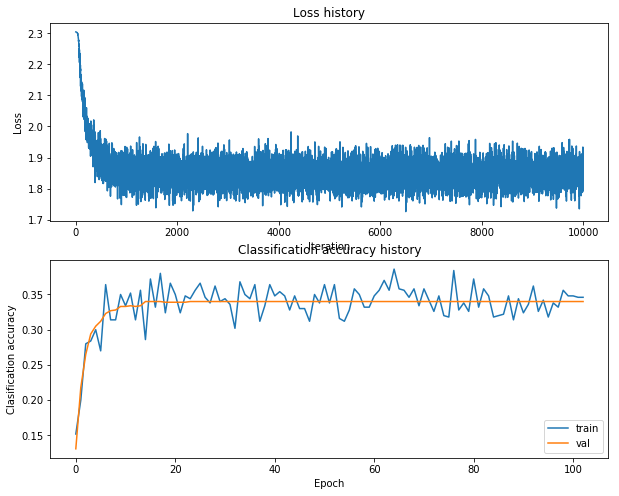

In [172]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.legend()
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

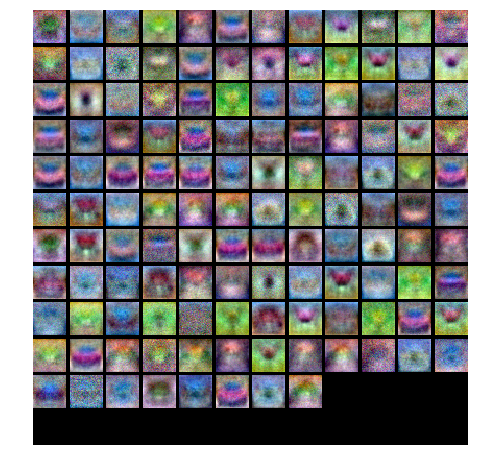

In [146]:
# visualize the weights of the best network
show_net_weights(best_net)

#### Debugging  Log,
1. changed definition of iterations_per_epoch, so as to make history compatible with some batch,num_iter comb  

2. noticed that num_iter = 1000 is way too low. 6000 seems sufficient...but it actually depends on learning rate.  

3. Also, the loss plot seems jumpy, so batch size = 300 may be too small, shall try large.

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)